In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Functions Used

In [2]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr, '', raw_html)
    return(cleantext)

tokenizer = RegexpTokenizer(r'\w+')
def token(x):
    ww = tokenizer.tokenize(x)
    return(ww)

stop = stopwords.words('english')
stop.extend(['day','ago'])
def remove_stopwords(x):
    words = [w for w in x if w not in stop]
    return(words)

#lemm = WordNetLemmatizer()

def word_lem(x):
    lem_text = " ".join(i for i in x)
    return(lem_text)

def plot_count(x,title):
    sns.set()
    plt.figure(figsize = (20,9))
    sns.barplot(x='ReviewText', y='count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Words',fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(rotation=45, fontsize = 15)
    plt.yticks(fontsize = 15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, int(height) + 3.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')
    plt.show()
    
    
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return(words_freq[:n])

def single_word(x, y,num):
    common_words = get_top_n_words(x['text'], num)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    
def bi_word(x, y,num):
    common_words = get_top_n_bigram(x['text'], num)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    n_words = pd.DataFrame(df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False))
    n_words.reset_index(inplace = True)
    print(n_words)
    plot_count(n_words, y)
    
def getlink(url,x):
    text_list = []
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = urlopen(jd_url)
            #jd_page = response.text
            jd_soup = BeautifulSoup(response, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            text = ' '.join(map(str, jd_desc)) 
            text = cleanhtml(text)
            text = text.replace('\n','')
            text_list.append(text)
    
        url_all = soup.findAll(attrs={'rel':['next']})

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df = pd.DataFrame(text_list, columns = ['text'])
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    df['text'] = df['text'].replace('\d+', '', regex=True)
    df['text'] = df['text'].apply(token)
    df['text'] = df['text'].apply(remove_stopwords)
    df['text'] = df['text'].apply(word_lem)
    return(df)

In [4]:
df2 = getlink("https://www.indeed.com/m/jobs?q=operations+manager",50) 

In [5]:
get_top_n_words(df2['text'], 50)

[('operations', 1925),
 ('management', 1497),
 ('work', 1469),
 ('experience', 1452),
 ('team', 1381),
 ('manager', 956),
 ('business', 948),
 ('service', 852),
 ('ability', 827),
 ('company', 825),
 ('customer', 821),
 ('job', 788),
 ('ensure', 764),
 ('skills', 738),
 ('required', 738),
 ('years', 717),
 ('including', 692),
 ('performance', 646),
 ('time', 601),
 ('must', 599),
 ('support', 586),
 ('position', 568),
 ('employees', 559),
 ('training', 540),
 ('quality', 537),
 ('safety', 530),
 ('operational', 507),
 ('environment', 492),
 ('new', 482),
 ('process', 471),
 ('responsible', 470),
 ('leadership', 455),
 ('days', 436),
 ('manage', 431),
 ('working', 424),
 ('provide', 423),
 ('staff', 419),
 ('information', 408),
 ('high', 407),
 ('within', 401),
 ('communication', 400),
 ('related', 399),
 ('project', 394),
 ('procedures', 394),
 ('knowledge', 391),
 ('responsibilities', 388),
 ('requirements', 388),
 ('goals', 387),
 ('people', 387),
 ('services', 380)]

In [6]:
get_top_n_bigram(df2['text'], 50)

[('operations manager', 469),
 ('customer service', 247),
 ('team members', 154),
 ('equal opportunity', 151),
 ('years experience', 151),
 ('work environment', 143),
 ('type full', 141),
 ('bachelor degree', 139),
 ('policies procedures', 132),
 ('communication skills', 127),
 ('management experience', 121),
 ('project management', 118),
 ('opportunity employer', 115),
 ('problem solving', 108),
 ('fast paced', 106),
 ('skills ability', 100),
 ('supply chain', 100),
 ('sexual orientation', 97),
 ('essential functions', 87),
 ('distribution center', 87),
 ('ability work', 87),
 ('job type', 85),
 ('gender identity', 85),
 ('manager responsible', 83),
 ('must able', 83),
 ('long term', 82),
 ('national origin', 82),
 ('united states', 80),
 ('full timesalary', 78),
 ('cross functional', 77),
 ('human resources', 77),
 ('location one', 74),
 ('general manager', 74),
 ('school diploma', 73),
 ('race color', 73),
 ('internal external', 70),
 ('best practices', 70),
 ('veteran status', 70),

https://www.indeed.com/m/jobs?q=operations+manager&l=Washington%2C+DC
     ReviewText  count
0    operations    762
1          work    674
2    experience    632
3    management    595
4          team    518
5       service    400
6       manager    378
7      business    363
8      required    323
9     including    319
10       skills    314
11     customer    307
12      support    297
13     services    290
14          job    287
15        staff    285
16        years    282
17  performance    271
18      ability    265
19     position    261


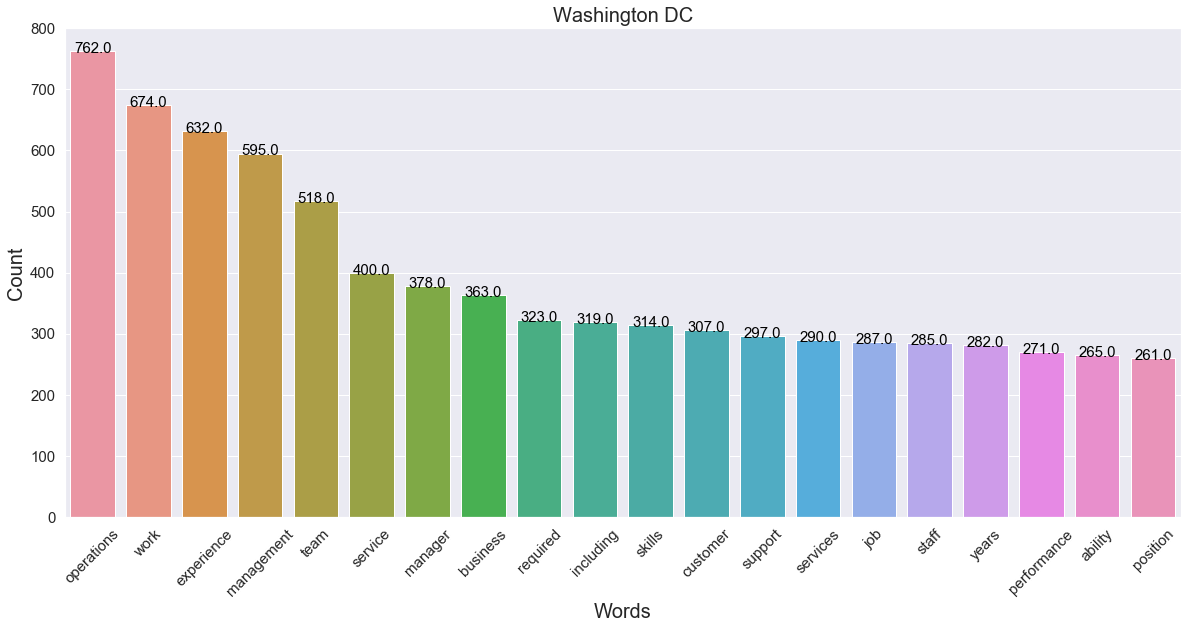

                ReviewText  count
0       operations manager    173
1         customer service    107
2         years experience     92
3        equal opportunity     91
4     communication skills     71
5             team members     67
6     opportunity employer     59
7         work environment     58
8       sexual orientation     52
9      essential functions     52
10         gender identity     49
11         bachelor degree     48
12          veteran status     47
13         national origin     47
14     policies procedures     46
15           food beverage     44
16               must able     43
17    qualified applicants     43
18  information technology     40
19      project management     40


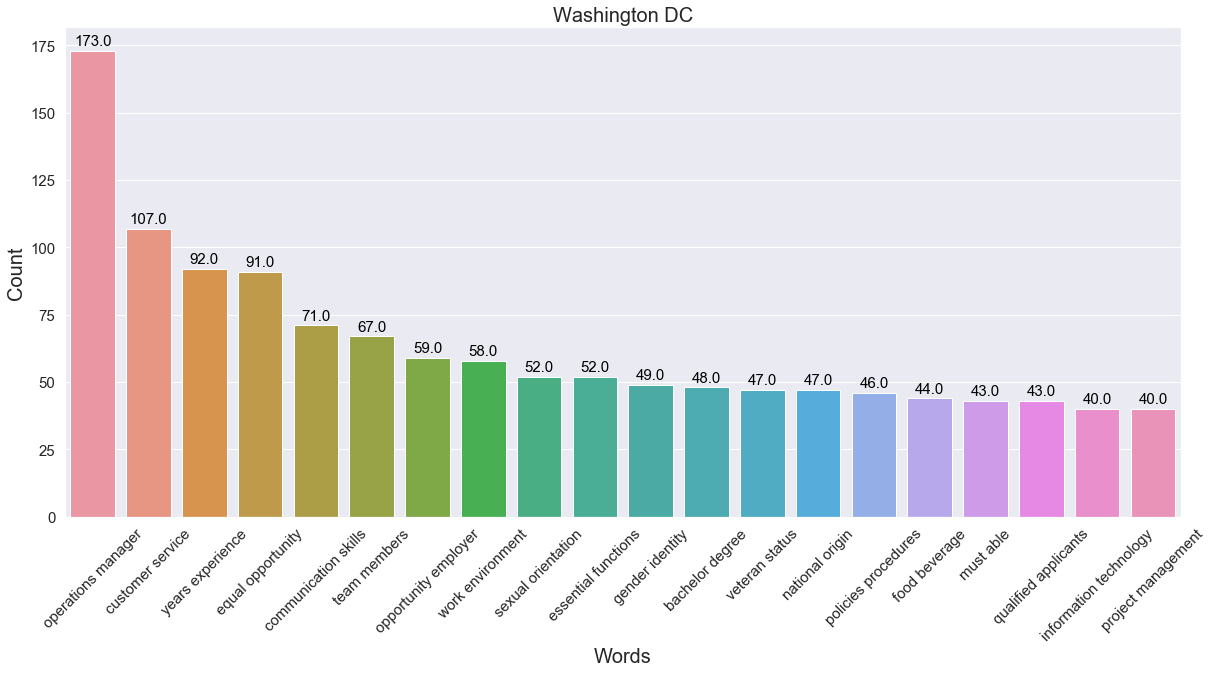

https://www.indeed.com/m/jobs?q=operations+manager&l=New+York
     ReviewText  count
0    operations    781
1          work    549
2    experience    534
3    management    512
4          team    510
5       manager    370
6     including    361
7           new    344
8       ability    310
9       service    301
10     business    299
11       ensure    282
12       skills    267
13      company    263
14     customer    262
15        years    257
16  performance    254
17      support    245
18          job    244
19        staff    244


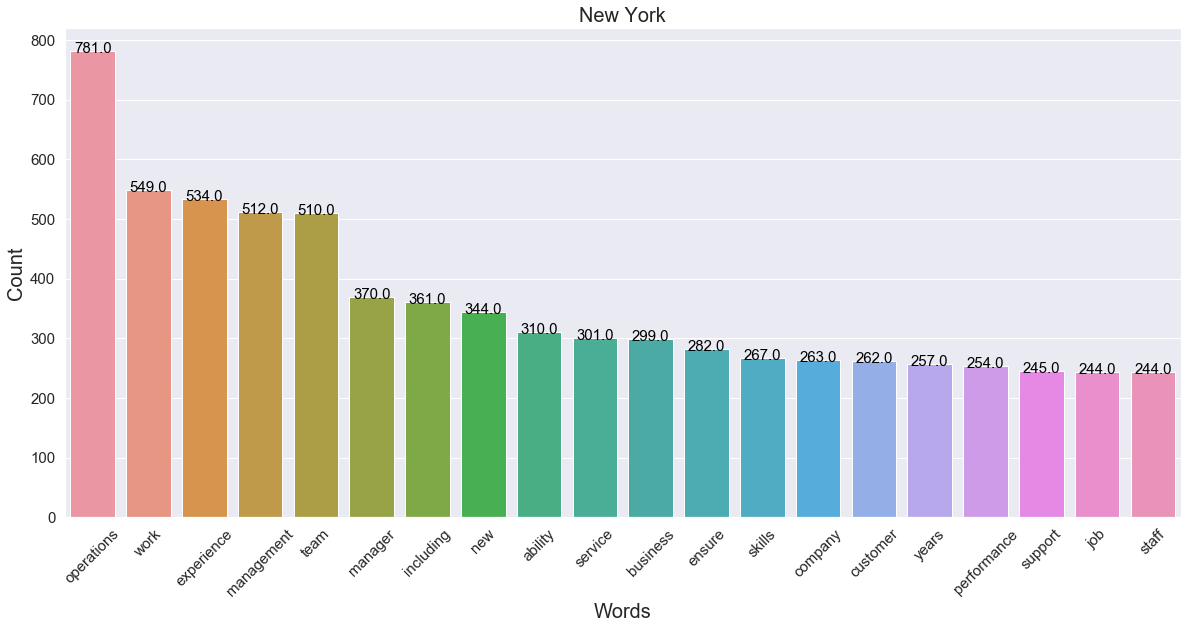

               ReviewText  count
0      operations manager    186
1                new york    126
2        customer service     97
3        years experience     71
4       equal opportunity     69
5              fast paced     66
6    opportunity employer     65
7    communication skills     59
8     policies procedures     59
9      sexual orientation     51
10        problem solving     48
11              type full     45
12        national origin     43
13              full time     42
14        gender identity     42
15           team members     42
16        bachelor degree     41
17  management experience     39
18             race color     38
19           ability work     37


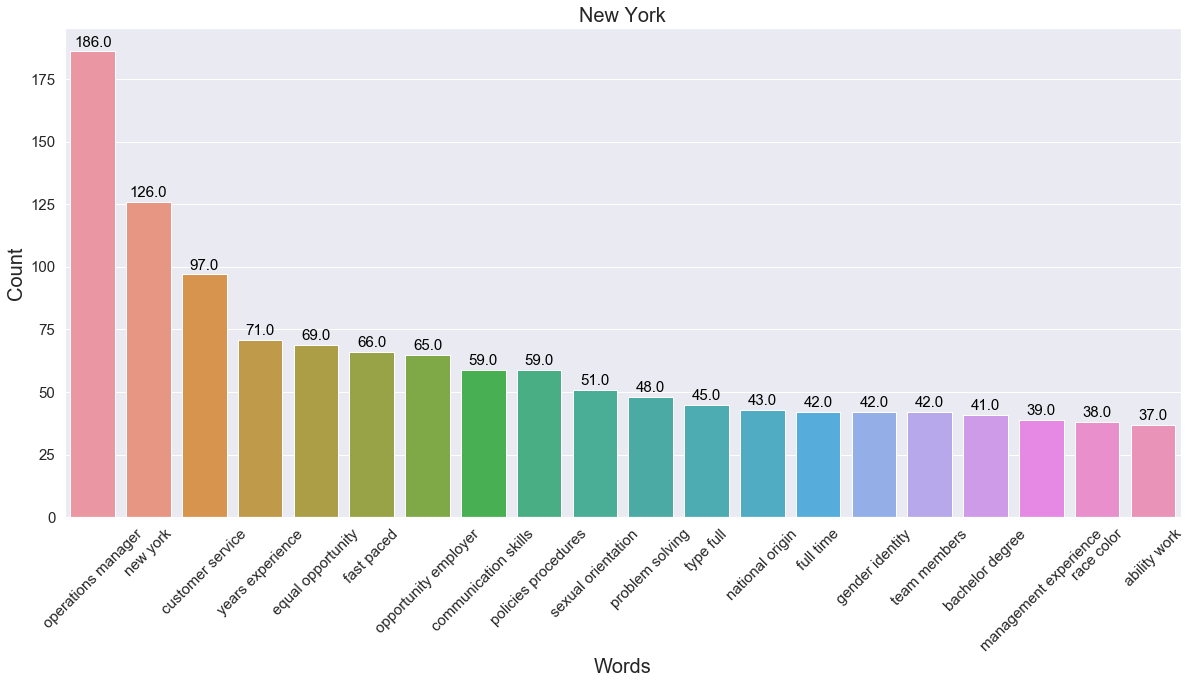

https://www.indeed.com/m/jobs?q=operations+manager&l=San+Francisco
    ReviewText  count
0   operations    838
1         team    753
2   experience    703
3         work    663
4     business    581
5   management    511
6      company    407
7      manager    372
8     customer    360
9    including    318
10     ability    305
11      ensure    299
12       years    299
13      skills    296
14      people    288
15     service    264
16     support    264
17         new    254
18         job    237
19        data    230


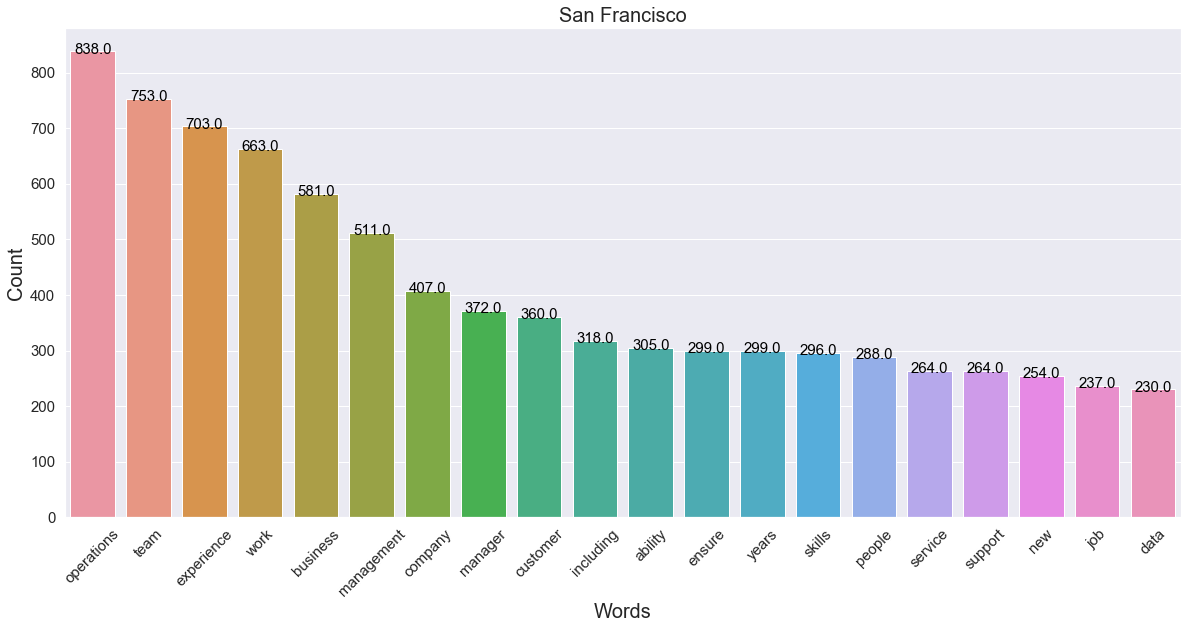

               ReviewText  count
0      operations manager    159
1           san francisco    138
2        cross functional    113
3        years experience    104
4        customer service     86
5            team members     85
6       equal opportunity     83
7      sexual orientation     70
8      project management     65
9    opportunity employer     63
10        national origin     62
11             fast paced     59
12    policies procedures     57
13        gender identity     56
14   communication skills     54
15         veteran status     54
16        operations team     49
17   qualified applicants     46
18  management experience     45
19             race color     45


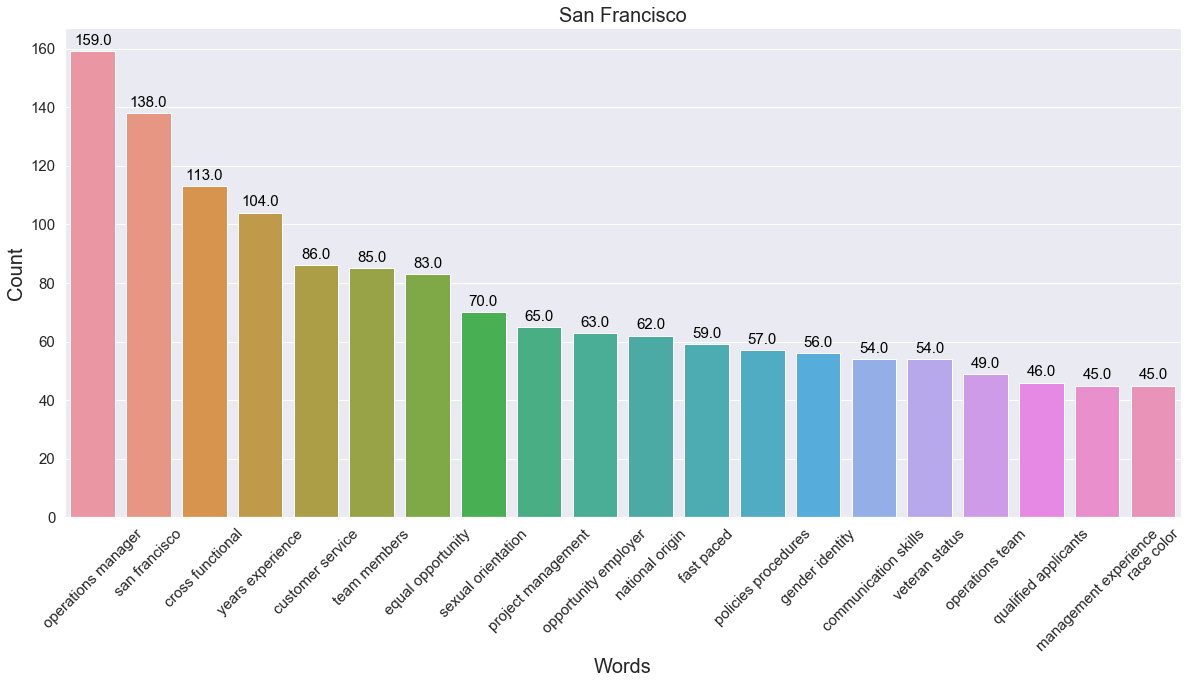

https://www.indeed.com/m/jobs?q=operations+manager&l=Chicago
     ReviewText  count
0    operations    838
1    management    653
2          team    645
3    experience    610
4          work    533
5      business    481
6      customer    466
7       service    373
8     including    344
9        ensure    338
10      manager    334
11       skills    333
12  performance    320
13        years    308
14      company    294
15     required    279
16     services    257
17   leadership    256
18      support    252
19      working    240


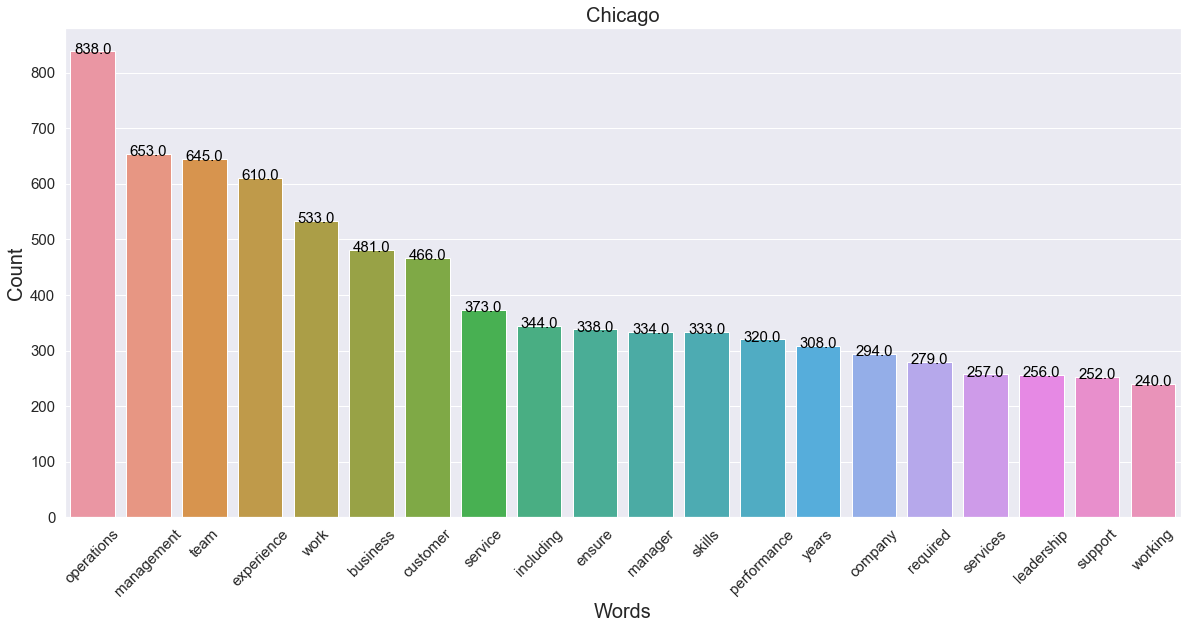

               ReviewText  count
0      operations manager    128
1        customer service    126
2            team members     94
3        years experience     82
4       equal opportunity     80
5     policies procedures     68
6      sexual orientation     64
7      project management     64
8            supply chain     63
9              fast paced     63
10       work environment     60
11   opportunity employer     59
12   communication skills     58
13        bachelor degree     58
14        national origin     57
15        gender identity     54
16             race color     54
17  management experience     53
18        problem solving     47
19         veteran status     47


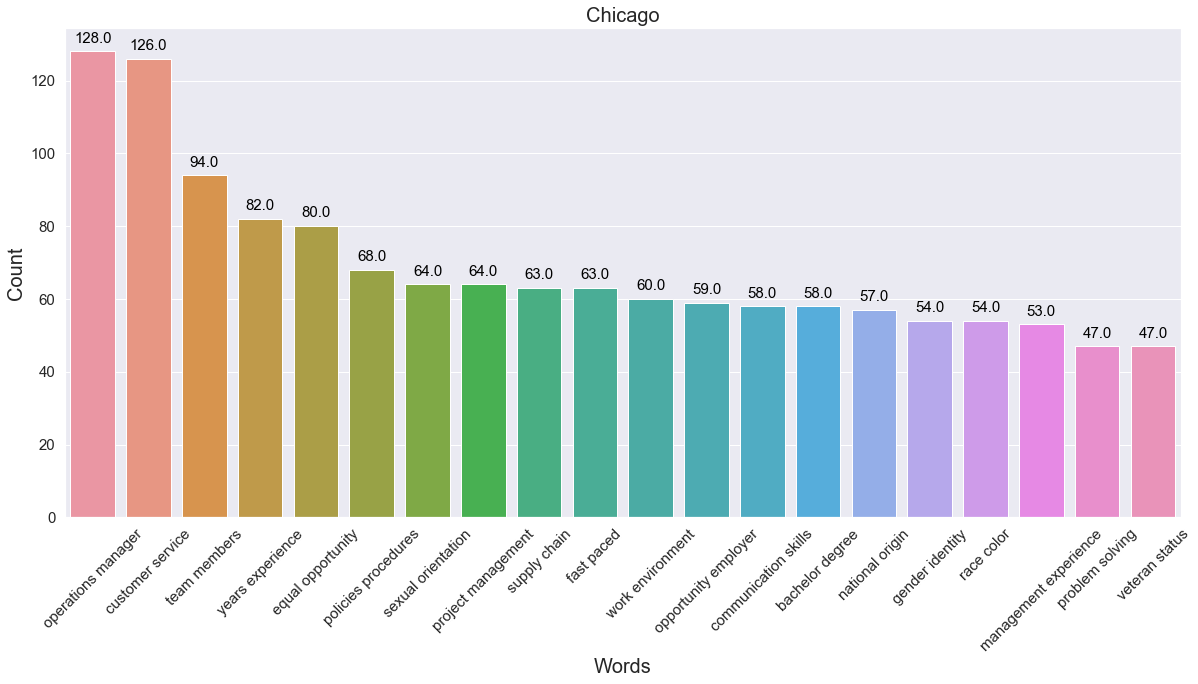

https://www.indeed.com/m/jobs?q=operations+manager&l=Philadelphia
     ReviewText  count
0    operations    712
1          work    678
2    experience    671
3    management    668
4          team    541
5      business    467
6       manager    359
7        ensure    358
8   performance    321
9       company    317
10        years    317
11      service    314
12       skills    312
13      ability    312
14     required    307
15    including    287
16      support    282
17          job    281
18  operational    278
19     customer    278


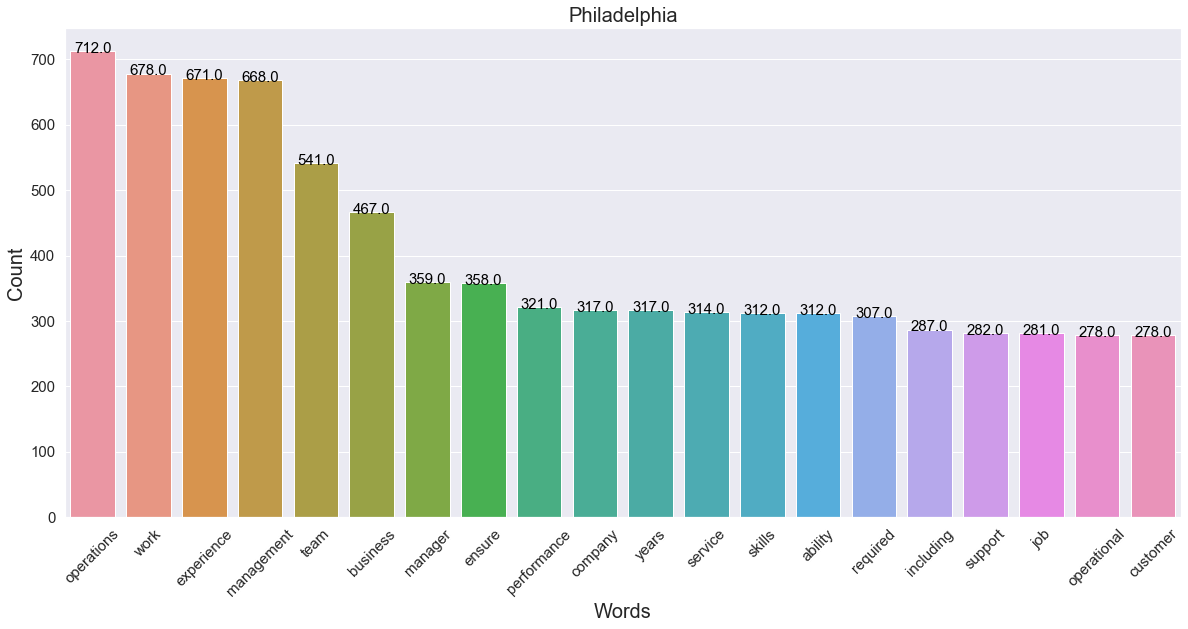

                  ReviewText  count
0         operations manager    172
1           years experience     98
2           customer service     82
3          equal opportunity     81
4           work environment     70
5       opportunity employer     68
6            bachelor degree     66
7        policies procedures     66
8         sexual orientation     62
9            national origin     58
10       essential functions     54
11           gender identity     52
12              team members     52
13   duties responsibilities     51
14            direct reports     48
15  responsibilities include     45
16         perform essential     44
17                fast paced     44
18     management experience     43
19            veteran status     43


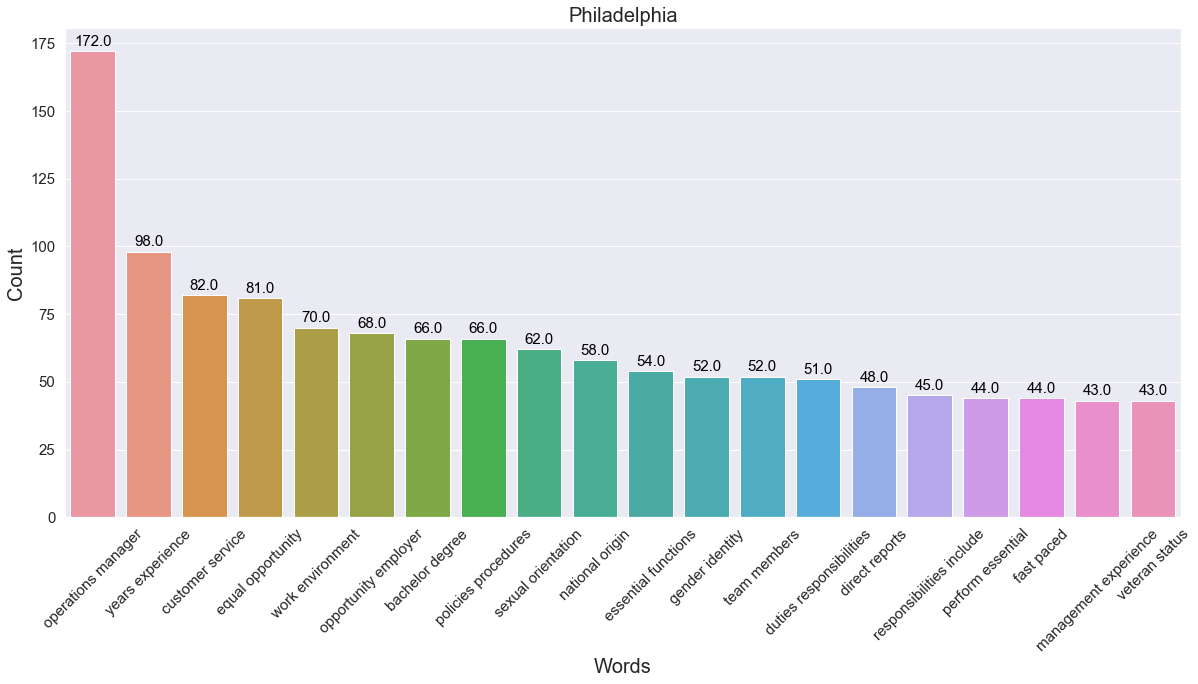

https://www.indeed.com/m/jobs?q=operations+manager&l=Houston
     ReviewText  count
0    operations    932
1    management    856
2    experience    754
3          work    734
4      business    609
5          team    569
6       service    519
7        skills    457
8       manager    440
9        ensure    407
10    including    405
11     required    398
12     customer    396
13      company    389
14      ability    376
15        years    372
16          job    360
17      support    318
18  performance    309
19  development    305


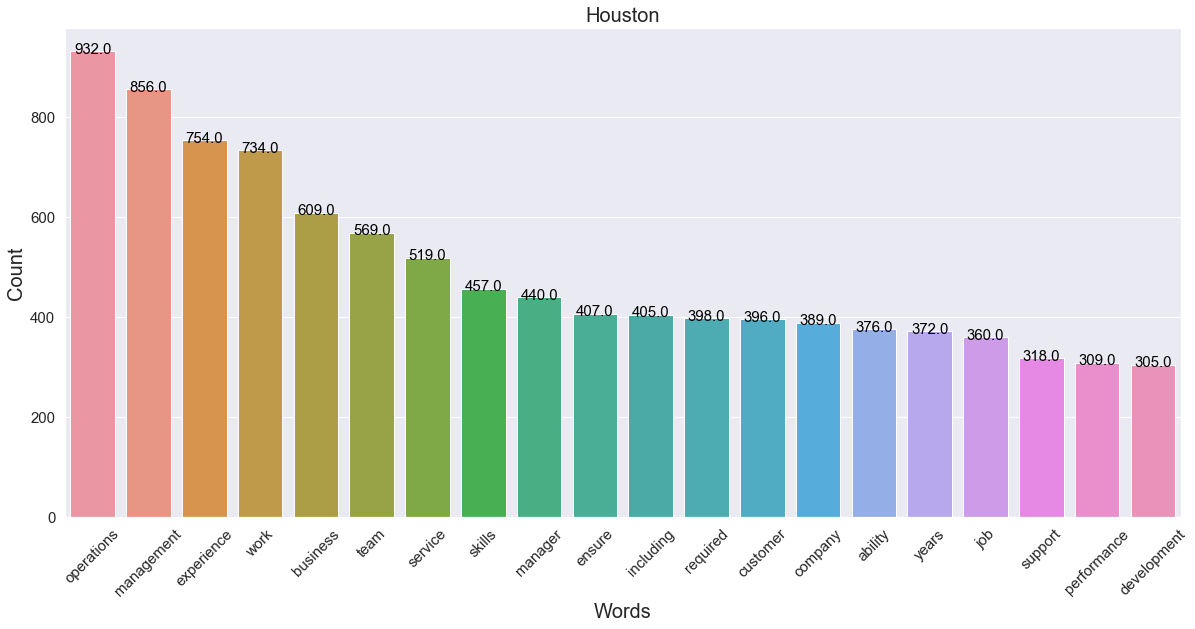

              ReviewText  count
0     operations manager    154
1       years experience    139
2       customer service    124
3      equal opportunity    101
4    policies procedures     83
5   opportunity employer     80
6           team members     73
7   communication skills     69
8              must able     68
9     sexual orientation     66
10            race color     66
11       national origin     65
12       bachelor degree     65
13     perform essential     61
14   essential functions     60
15           state local     59
16       gender identity     58
17        color religion     58
18        veteran status     57
19    project management     57


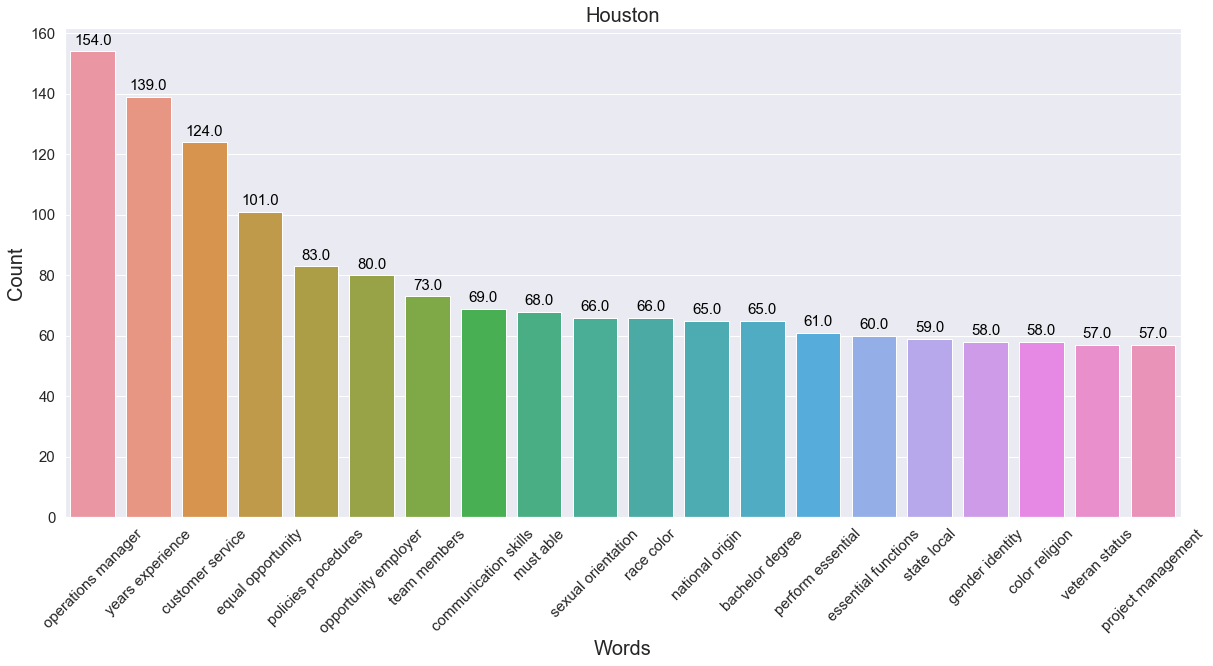

In [7]:
items = {'Washington%2C+DC':20,'New+York':20, 'San+Francisco':20, 'Chicago':20, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=operations+manager&l={}'
df_all = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df3 = getlink(url,i[1])
    if i[0] == 'Washington%2C+DC':
        single_word(df3, 'Washington DC',i[1])
        bi_word(df3, 'Washington DC',i[1])
    elif i[0] == 'New+York':
        single_word(df3, 'New York',i[1])
        bi_word(df3, 'New York',i[1])
    elif i[0] == 'San+Francisco':
        single_word(df3, 'San Francisco',i[1])
        bi_word(df3, 'San Francisco',i[1])
    else:
        single_word(df3, i[0],i[1])
        bi_word(df3, i[0],i[1])
    df_all = df_all.append(df3)

     ReviewText  count
0    operations   4863
1    experience   3904
2          work   3831
3    management   3795
4          team   3536
5      business   2800
6       manager   2253
7       service   2171
8      customer   2069
9     including   2034
10       skills   1979
11       ensure   1924
12      company   1907
13        years   1835
14      ability   1807
15     required   1709
16  performance   1678
17      support   1658
18          job   1620
19        staff   1443


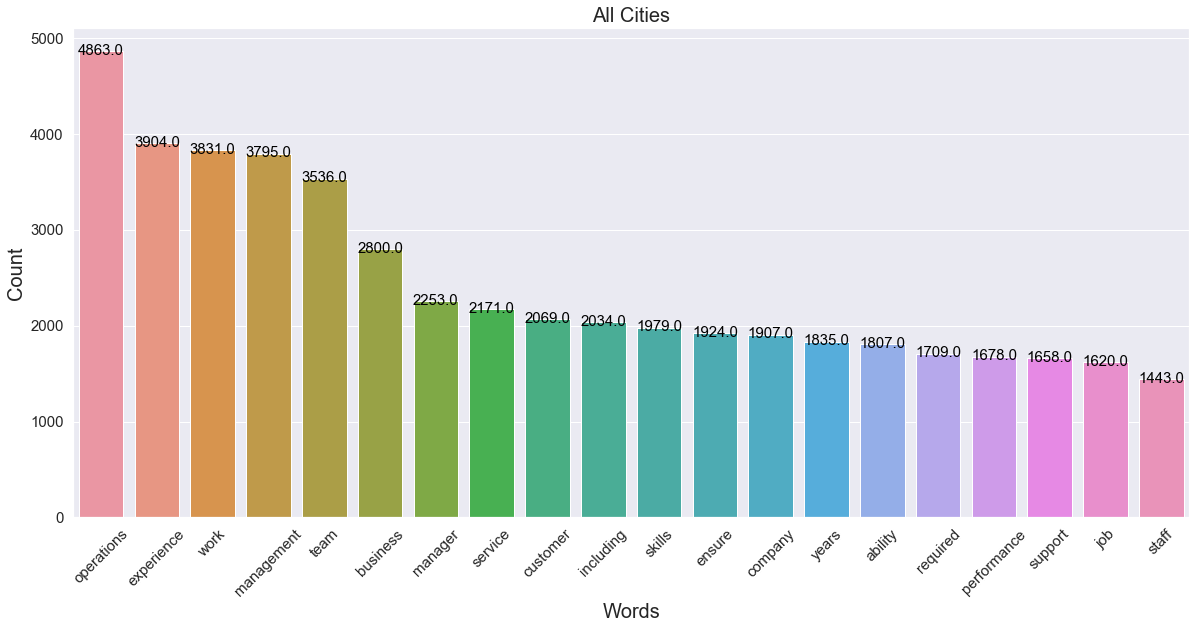

In [8]:
single_word(df_all, 'All Cities', 20)

               ReviewText  count
0      operations manager    972
1        customer service    622
2        years experience    586
3       equal opportunity    505
4            team members    413
5    opportunity employer    394
6     policies procedures    379
7      sexual orientation    365
8    communication skills    352
9         national origin    332
10        bachelor degree    321
11             fast paced    314
12        gender identity    311
13       work environment    306
14     project management    299
15             race color    284
16         veteran status    280
17  management experience    265
18        problem solving    253
19       cross functional    239


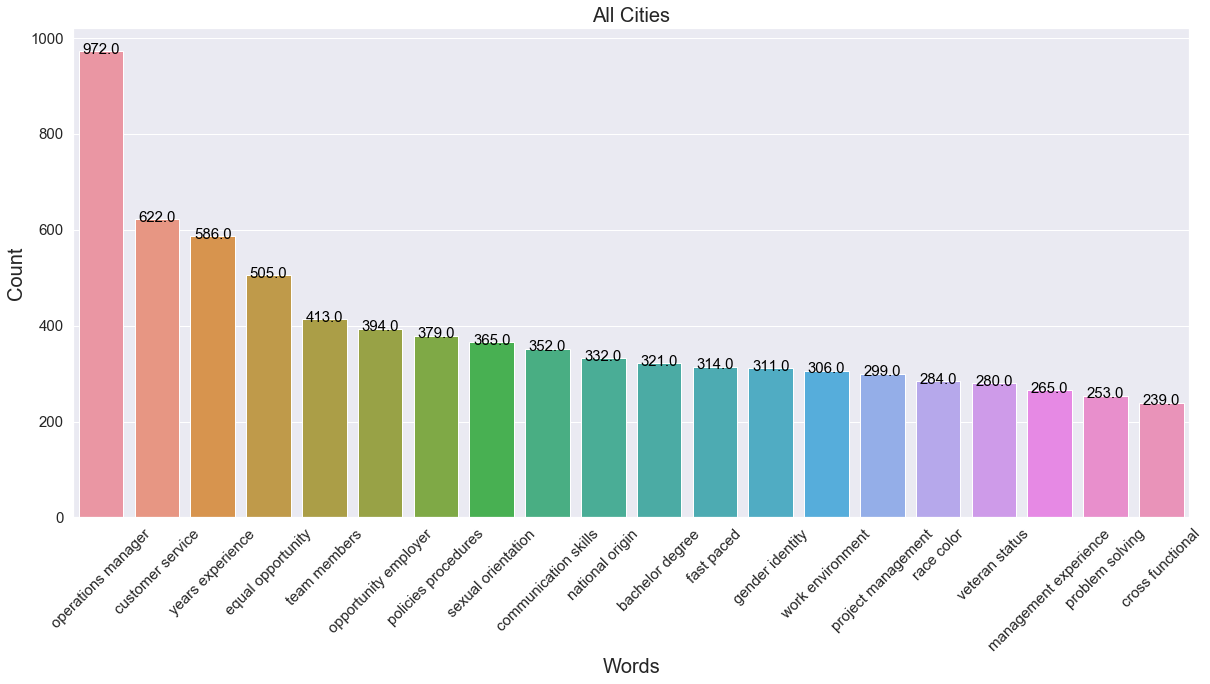

In [9]:
bi_word(df_all, 'All Cities', 20)

### Operations Director

#### Nationwide

In [10]:
df3 = getlink("https://www.indeed.com/m/jobs?q=operations+director",50)

In [11]:
get_top_n_words(df3['text'], 50)

[('management', 1638),
 ('operations', 1535),
 ('experience', 1495),
 ('work', 1324),
 ('team', 1153),
 ('director', 917),
 ('business', 916),
 ('ability', 859),
 ('service', 850),
 ('skills', 803),
 ('required', 788),
 ('including', 775),
 ('years', 735),
 ('ensure', 729),
 ('customer', 693),
 ('new', 683),
 ('staff', 682),
 ('services', 629),
 ('company', 613),
 ('support', 606),
 ('job', 593),
 ('development', 587),
 ('position', 562),
 ('responsible', 539),
 ('program', 526),
 ('performance', 522),
 ('leadership', 514),
 ('time', 505),
 ('training', 500),
 ('knowledge', 494),
 ('must', 487),
 ('within', 484),
 ('quality', 480),
 ('health', 476),
 ('related', 471),
 ('procedures', 463),
 ('department', 444),
 ('programs', 437),
 ('days', 429),
 ('high', 428),
 ('security', 424),
 ('care', 423),
 ('operational', 414),
 ('environment', 408),
 ('employees', 408),
 ('develop', 399),
 ('responsibilities', 390),
 ('manage', 386),
 ('provide', 385),
 ('working', 384)]

In [12]:
get_top_n_bigram(df3['text'], 50)

[('policies procedures', 218),
 ('customer service', 193),
 ('years experience', 180),
 ('director operations', 176),
 ('equal opportunity', 159),
 ('team members', 154),
 ('communication skills', 129),
 ('bachelor degree', 126),
 ('new jersey', 122),
 ('new york', 113),
 ('opportunity employer', 112),
 ('management experience', 101),
 ('full time', 101),
 ('type full', 97),
 ('fast paced', 96),
 ('human resources', 96),
 ('sexual orientation', 95),
 ('national origin', 94),
 ('ability work', 92),
 ('internal external', 88),
 ('long term', 87),
 ('work environment', 87),
 ('duties responsibilities', 86),
 ('project management', 86),
 ('problem solving', 86),
 ('track record', 82),
 ('skills ability', 82),
 ('must able', 79),
 ('supply chain', 78),
 ('related field', 78),
 ('veteran status', 77),
 ('gender identity', 76),
 ('best practices', 74),
 ('high school', 73),
 ('job type', 70),
 ('race color', 70),
 ('federal state', 69),
 ('including limited', 68),
 ('school diploma', 67),
 ('

https://www.indeed.com/m/jobs?q=operations+director&l=Washington%2C+DC
     ReviewText  count
0    experience    887
1          work    832
2      position    702
3    management    647
4    operations    594
5      required    558
6          team    558
7      director    549
8          must    506
9     including    451
10      ability    441
11  information    440
12      service    426
13        staff    420
14      support    402
15      program    385
16       skills    365
17         time    359
18       office    354
19          may    335


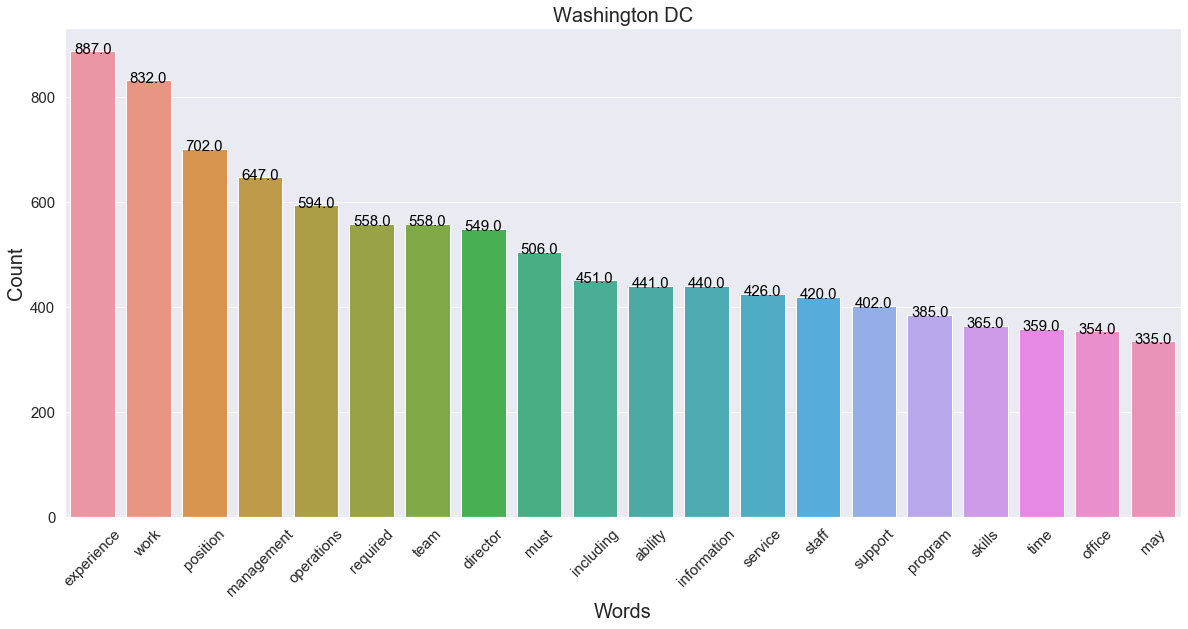

                ReviewText  count
0        equal opportunity     93
1      policies procedures     89
2             team members     88
3          human resources     79
4      director operations     78
5          bachelor degree     78
6                full time     76
7     opportunity employer     75
8          national origin     74
9       sexual orientation     69
10           washington dc     64
11        years experience     63
12          veteran status     62
13  specialized experience     61
14        customer service     61
15         gender identity     61
16             must submit     58
17  minimum qualifications     57
18              race color     53
19            ability work     53


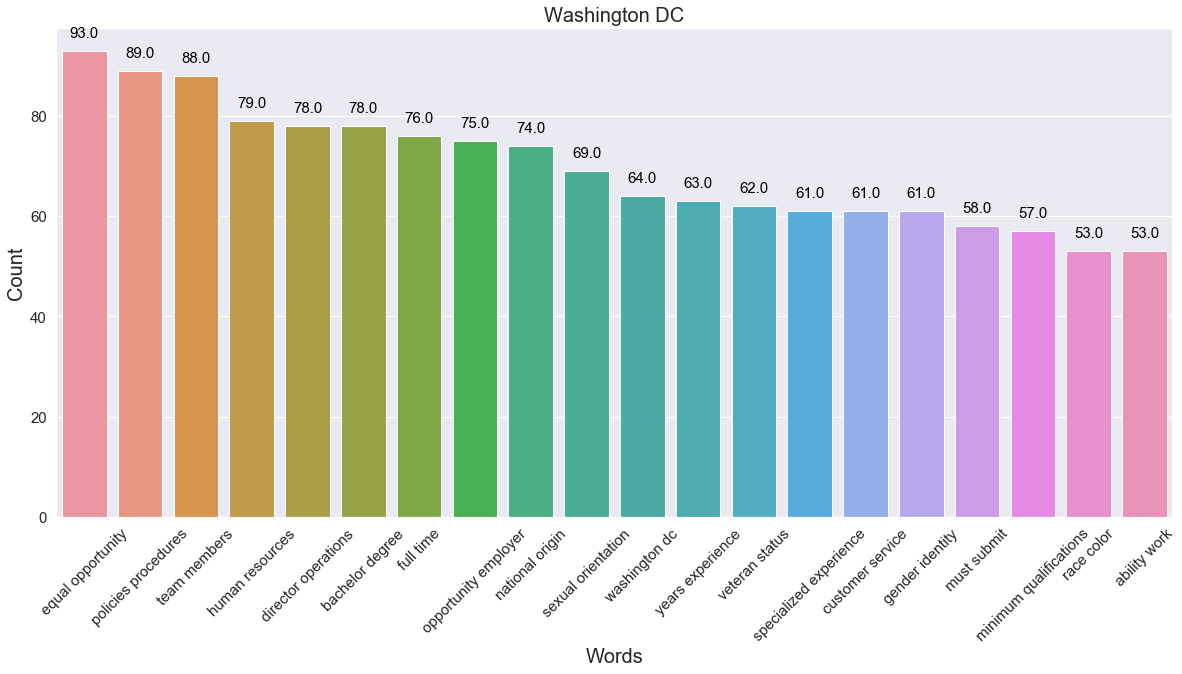

https://www.indeed.com/m/jobs?q=operations+director&l=New+York
     ReviewText  count
0    experience    927
1    operations    846
2    management    781
3          work    718
4          team    571
5           new    522
6      business    504
7      director    503
8         years    474
9       service    471
10        staff    451
11    including    449
12       skills    420
13       ensure    418
14      ability    404
15     services    376
16      support    374
17      program    351
18         must    327
19  development    324


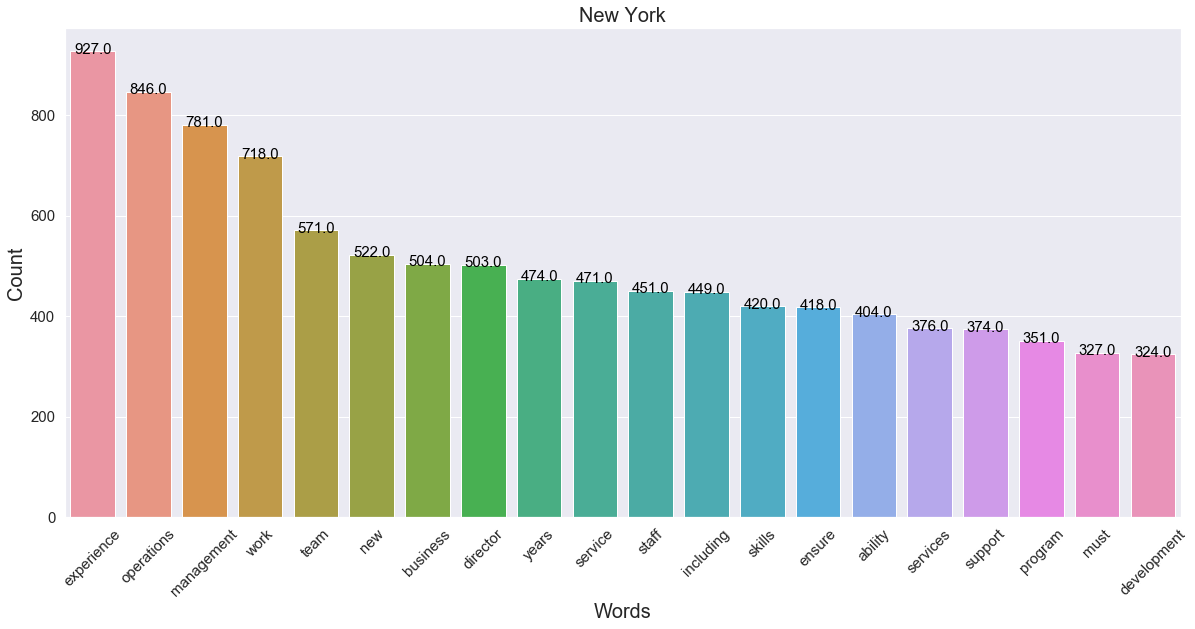

               ReviewText  count
0                new york    222
1        years experience    111
2        customer service    107
3               york city     94
4     director operations     94
5    communication skills     92
6     policies procedures     89
7       equal opportunity     80
8               full time     77
9            team members     70
10        bachelor degree     63
11   opportunity employer     59
12      internal external     58
13             fast paced     58
14        problem solving     58
15     project management     58
16              two years     58
17     accredited college     57
18   experience described     54
19  management experience     54


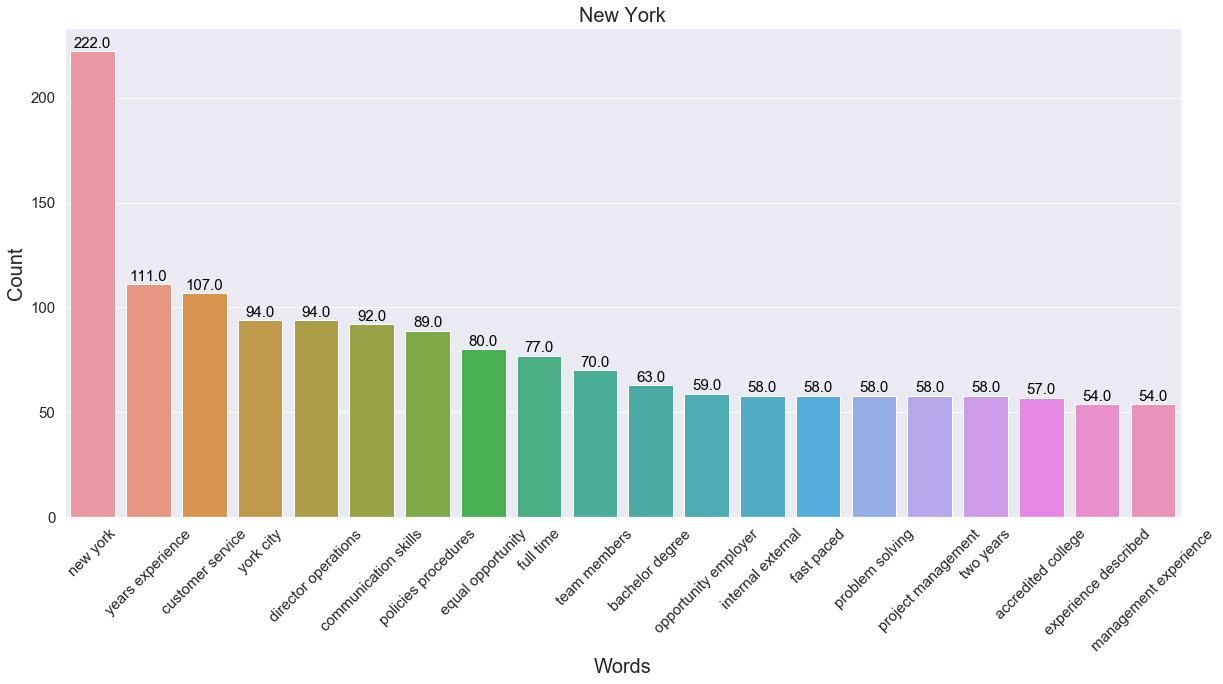

https://www.indeed.com/m/jobs?q=operations+director&l=San+Francisco
     ReviewText  count
0    experience    751
1          work    686
2    management    662
3    operations    630
4          team    599
5      business    524
6      director    412
7     including    372
8         staff    350
9       support    343
10     customer    334
11          san    330
12      service    326
13       skills    323
14      ability    322
15  development    317
16      program    315
17     position    312
18    francisco    297
19     required    296


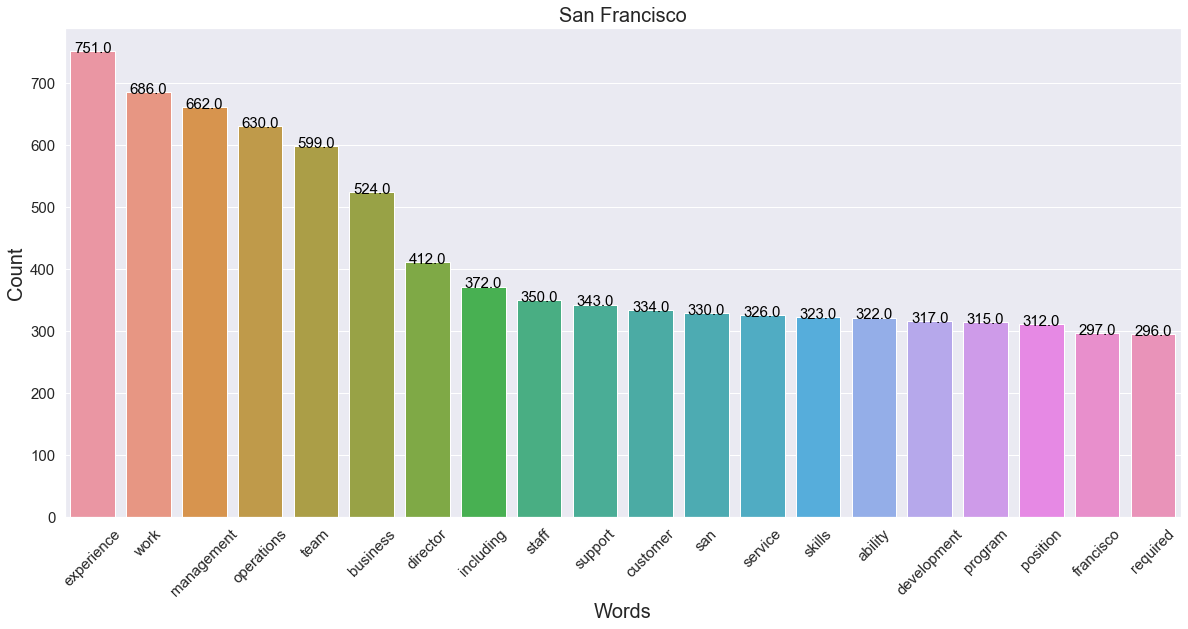

               ReviewText  count
0           san francisco    283
1        customer service     89
2               full time     76
3        years experience     73
4         human resources     72
5        cross functional     71
6       equal opportunity     69
7         problem solving     66
8         work experience     59
9    opportunity employer     58
10     sexual orientation     55
11    policies procedures     55
12   qualified applicants     54
13        national origin     53
14  university california     51
15          dental vision     47
16           team members     47
17   communication skills     44
18    director operations     43
19         california san     43


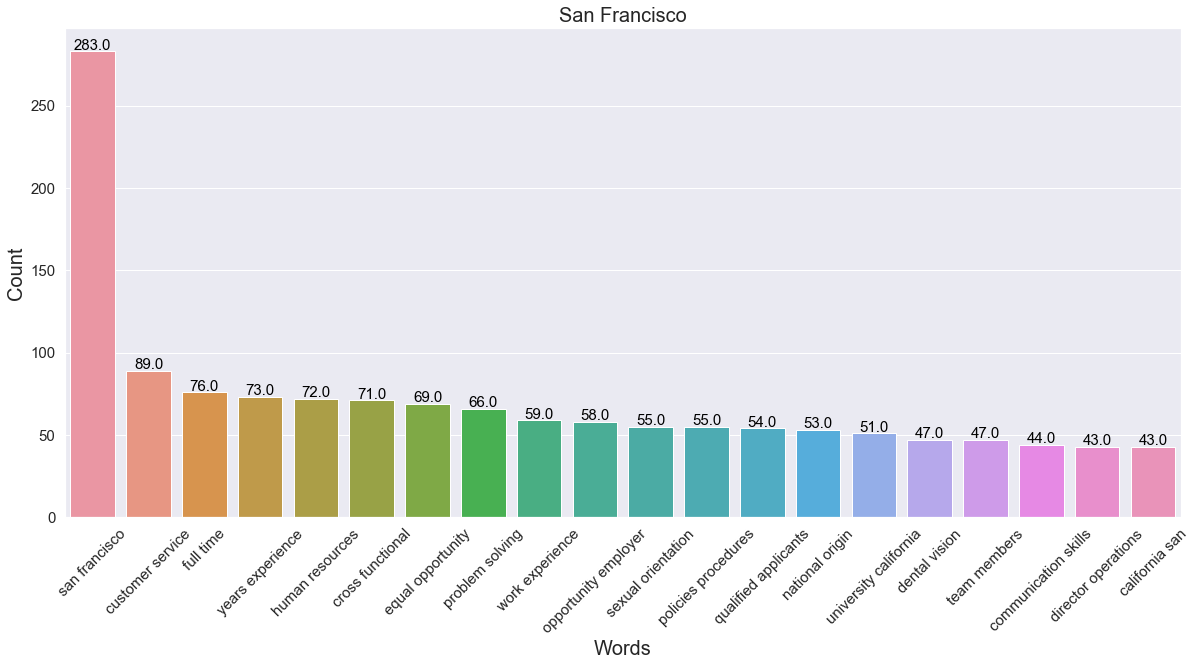

https://www.indeed.com/m/jobs?q=operations+director&l=Chicago
     ReviewText  count
0    experience    711
1    management    642
2          work    642
3    operations    641
4          team    567
5      business    490
6       ability    471
7       service    444
8         staff    416
9        ensure    403
10     director    396
11    including    360
12     customer    352
13       skills    343
14      support    340
15     required    318
16        years    296
17   leadership    295
18  development    294
19     services    279


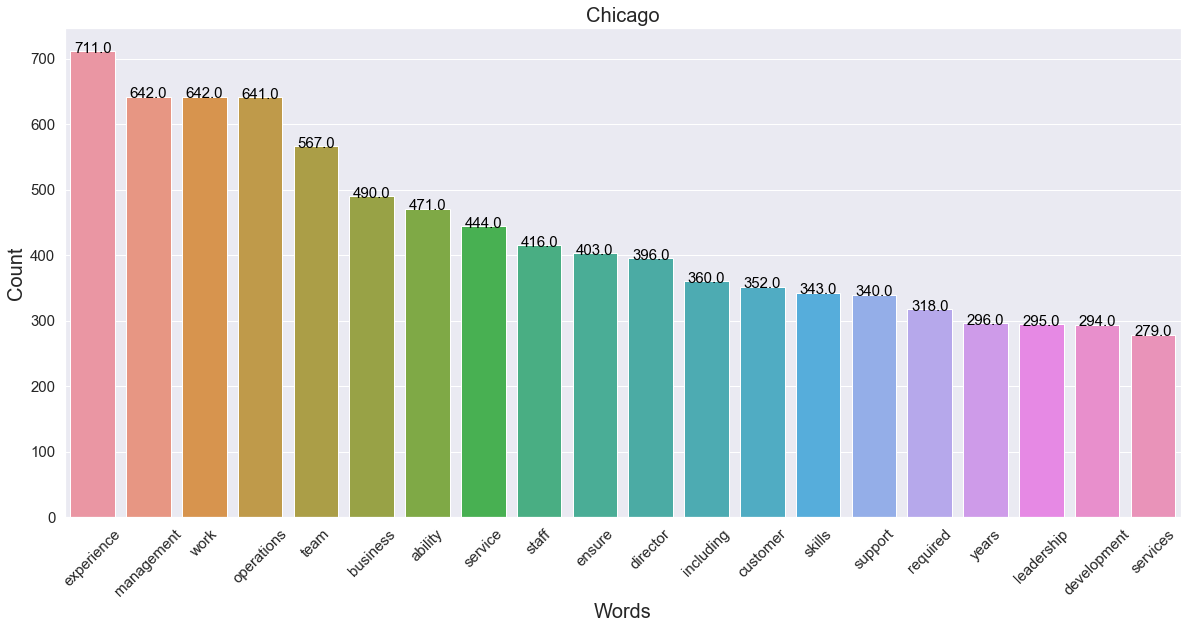

               ReviewText  count
0        customer service    116
1     policies procedures    102
2     director operations     80
3            team members     79
4        years experience     72
5      patient experience     67
6               must able     62
7       equal opportunity     57
8          skills ability     52
9          direct reports     47
10           ability work     47
11  management experience     47
12         best practices     46
13      internal external     46
14        bachelor degree     44
15   communication skills     42
16    customer experience     41
17   opportunity employer     40
18        leadership team     39
19     project management     39


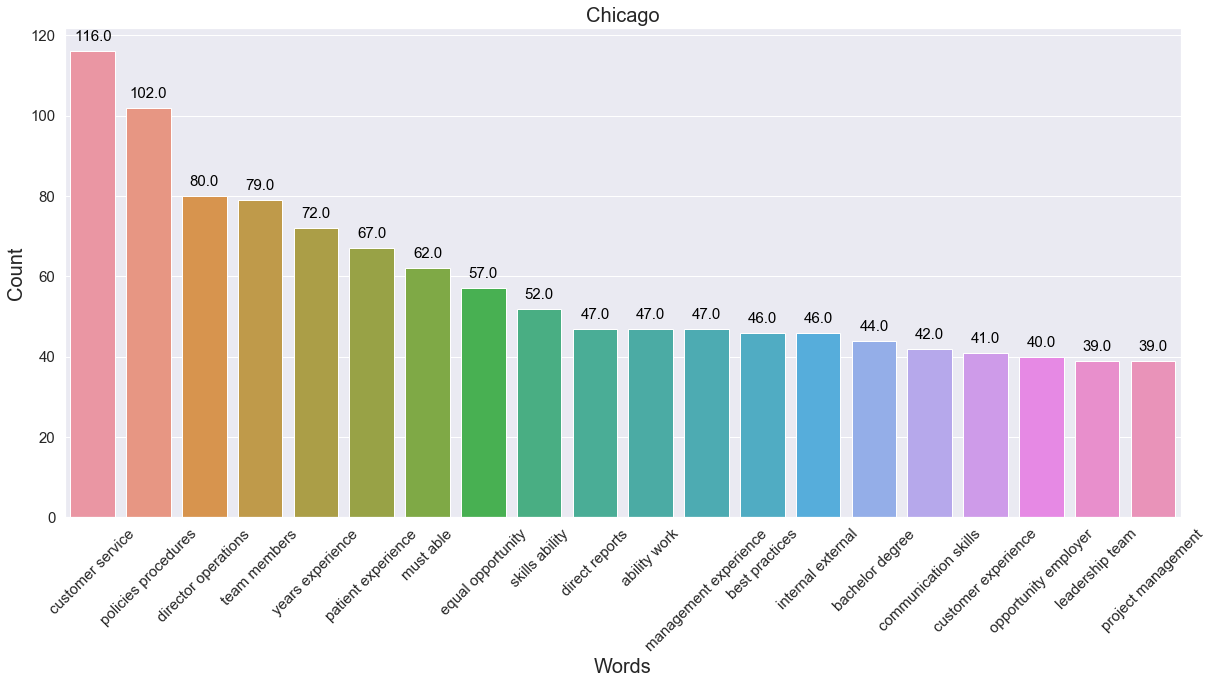

https://www.indeed.com/m/jobs?q=operations+director&l=Philadelphia
    ReviewText  count
0         work    749
1   experience    731
2   management    661
3   operations    562
4         team    537
5     director    525
6      service    506
7      ability    500
8        staff    491
9    including    459
10    required    407
11    services    404
12      health    387
13      ensure    381
14         job    369
15    business    357
16    customer    323
17     support    322
18      skills    301
19        must    299


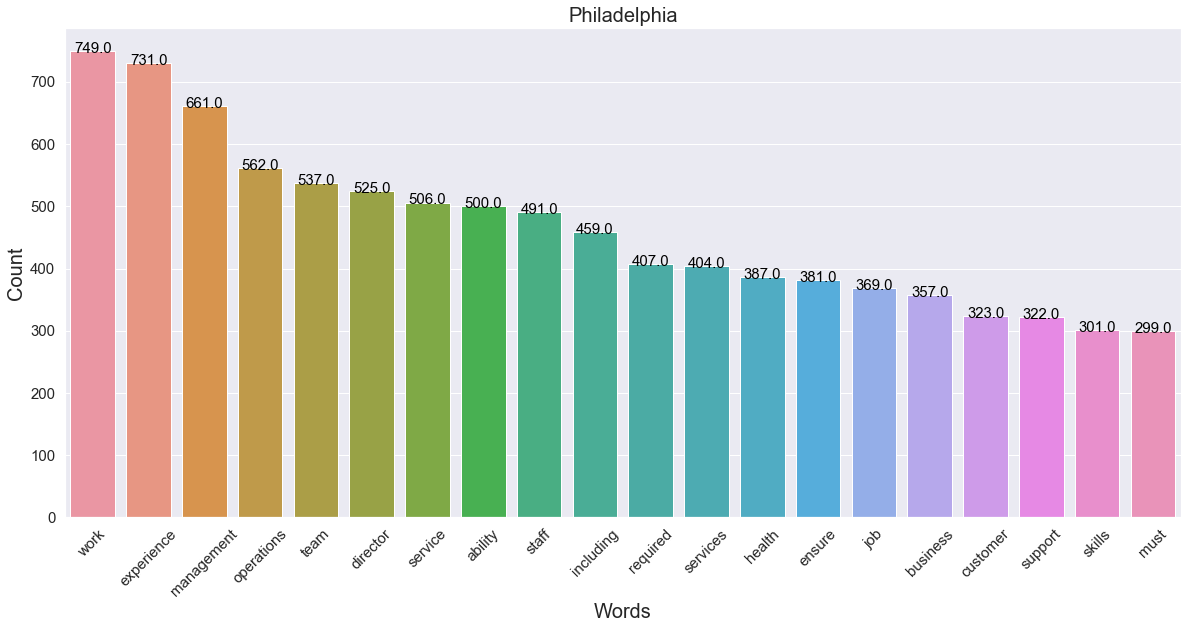

                 ReviewText  count
0       policies procedures    112
1          customer service    110
2         equal opportunity     89
3          years experience     84
4           bachelor degree     76
5      opportunity employer     68
6                 must able     66
7          work environment     63
8          thomas jefferson     62
9      jefferson university     62
10           veteran status     61
11          national origin     59
12       sexual orientation     59
13              state local     58
14              health care     57
15             team members     57
16  duties responsibilities     56
17            federal state     54
18               race color     53
19             ability work     53


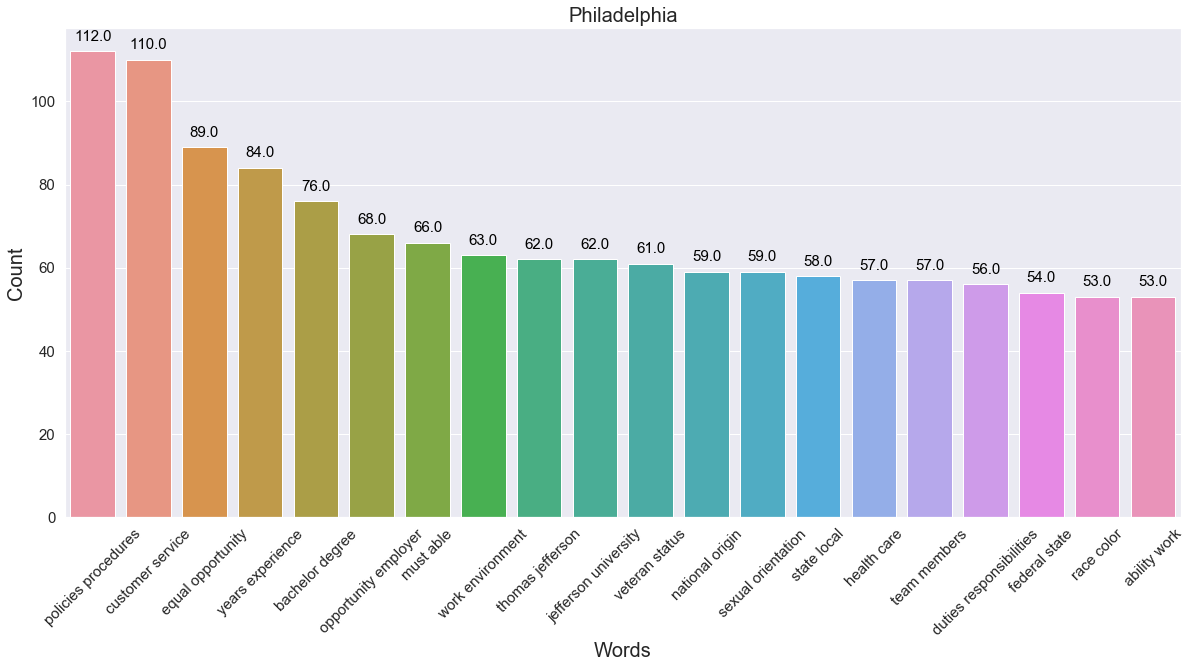

https://www.indeed.com/m/jobs?q=operations+director&l=Houston
     ReviewText  count
0    management    716
1    experience    713
2          work    676
3    operations    578
4      business    540
5      director    491
6          team    488
7        skills    460
8       ability    453
9      required    451
10       ensure    415
11          job    410
12        staff    402
13      service    390
14    including    388
15     customer    383
16        years    353
17         must    330
18     services    311
19  development    306


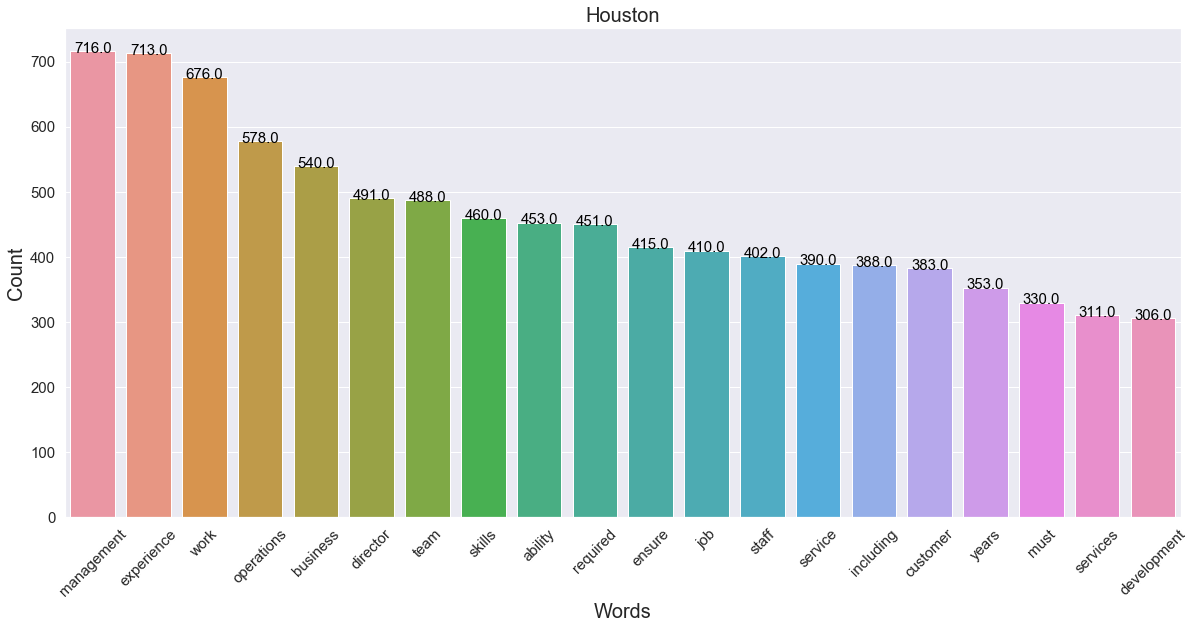

               ReviewText  count
0        customer service    115
1     policies procedures    113
2     essential functions    101
3               must able     94
4         human resources     76
5       perform essential     76
6        years experience     76
7         bachelor degree     76
8    communication skills     73
9            team members     69
10      equal opportunity     68
11           supply chain     64
12              salary us     60
13             dollar usd     60
14              us dollar     60
15  management experience     59
16          federal state     58
17       work environment     57
18   opportunity employer     55
19        problem solving     51


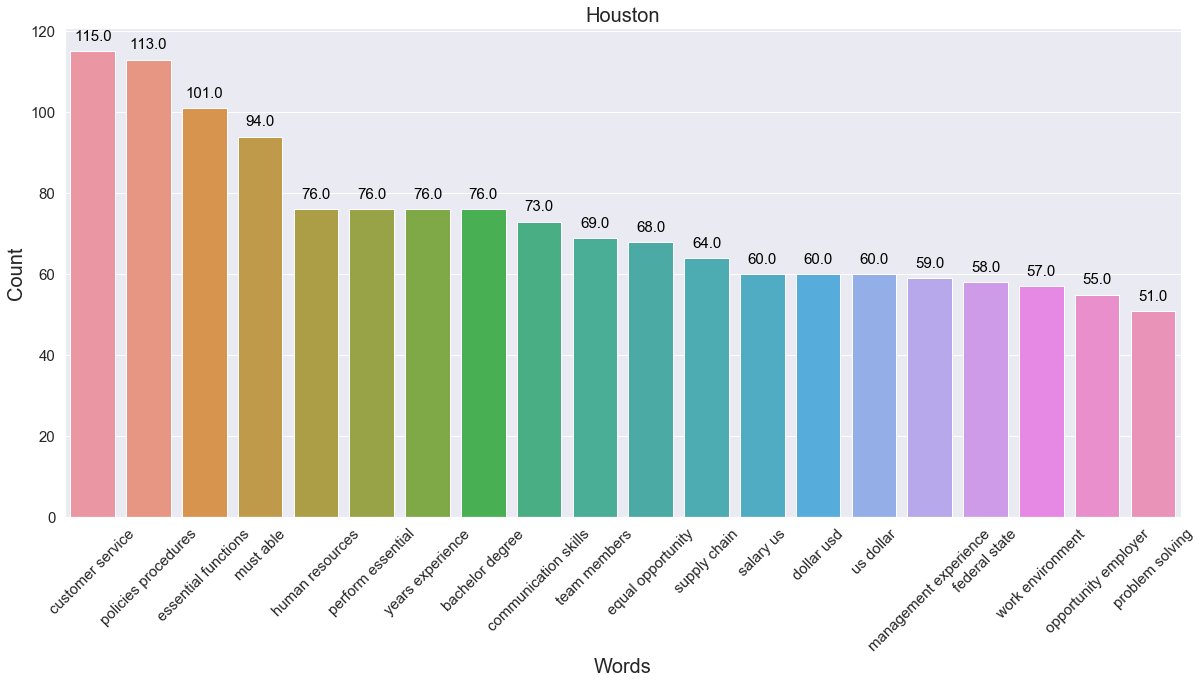

In [13]:
items = {'Washington%2C+DC':20,'New+York':20, 'San+Francisco':20, 'Chicago':20, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=operations+director&l={}'
df_all2 = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df3 = getlink(url,i[1])
    if i[0] == 'Washington%2C+DC':
        single_word(df3, 'Washington DC',i[1])
        bi_word(df3, 'Washington DC',i[1])
    elif i[0] == 'New+York':
        single_word(df3, 'New York',i[1])
        bi_word(df3, 'New York',i[1])
    elif i[0] == 'San+Francisco':
        single_word(df3, 'San Francisco',i[1])
        bi_word(df3, 'San Francisco',i[1])
    else:
        single_word(df3, i[0],i[1])
        bi_word(df3, i[0],i[1])
    df_all2 = df_all2.append(df3)

    ReviewText  count
0   experience   4720
1         work   4303
2   management   4109
3   operations   3851
4         team   3320
5     director   2876
6     business   2731
7      ability   2591
8      service   2563
9        staff   2530
10   including   2479
11    required   2349
12      skills   2212
13      ensure   2211
14    position   2098
15     support   2072
16       years   2013
17    services   1961
18        must   1905
19    customer   1872


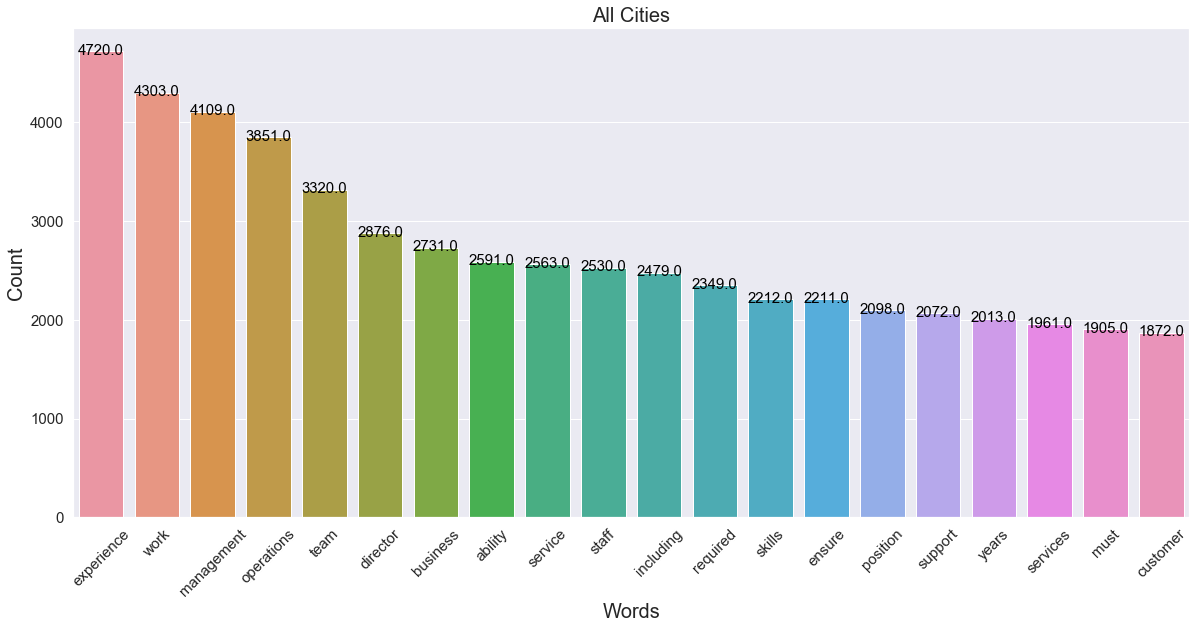

In [14]:
single_word(df_all2, 'All Cities', 20)

              ReviewText  count
0       customer service    598
1    policies procedures    560
2       years experience    479
3      equal opportunity    456
4           team members    410
5        bachelor degree    371
6    director operations    362
7   opportunity employer    355
8        human resources    353
9   communication skills    340
10             must able    335
11       national origin    320
12             full time    319
13    sexual orientation    312
14       problem solving    299
15         san francisco    296
16   essential functions    290
17        veteran status    269
18              new york    267
19          ability work    266


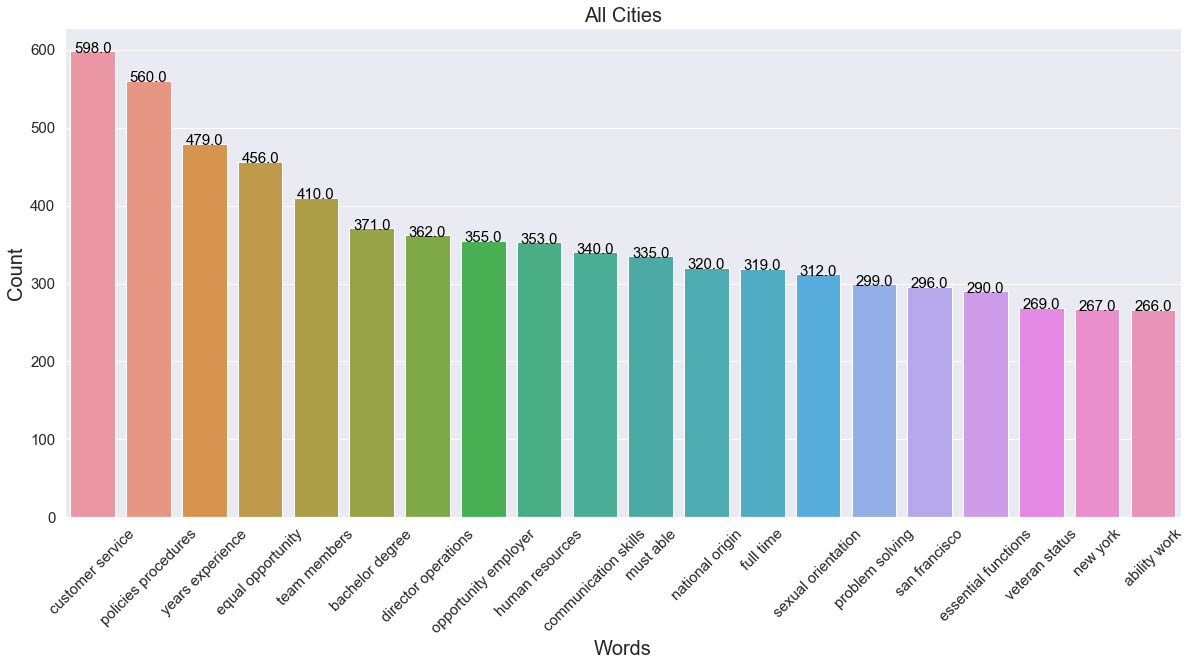

In [15]:
bi_word(df_all2, 'All Cities', 20)

### Scrapping Job skills

##### Operations Manager

In [17]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)


def getlink2(url,x):
    lang = ["PowerPoint", "Forecasting", "SQL","Tableau", "Excel", "SAS", "SAP",
           "Communication", 'Problem_Solving','Analytical_Skills','Outlook', "Critical_Thinking",
           "Salesforce", 'Teamwork', 'Supply Chain', 'Customer Service', 'Project Management']
    df2 = pd.DataFrame([], columns = lang)
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            sum_py = 0
            sum_pp = 0
            sum_fcast = 0
            sum_sql = 0
            sum_tableau = 0
            sum_ex = 0 
            sum_sap = 0
            sum_sas = 0
            sum_com = 0
            sum_ps = 0 
            sum_ays = 0
            sum_out = 0 
            sum_ct = 0
            sum_qs = 0
            sum_tm = 0
            sum_sc = 0
            sum_cs = 0
            sum_pm = 0 
        
            
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = urlopen(jd_url)
            jd_soup = BeautifulSoup(response, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']})
            
            pp = re.findall(r'[\/\s\b]Power[Pp]oint[\/\b\s,]?', str(jd_desc))
            pp2 = count_in(pp)
            sum_pp = sum_pp + pp2

            fcast = re.findall(r'[\s\/\b]?[Ff]orecasting[\b\s\/,]', str(jd_desc))
            fcast2 = count_in(fcast)
            sum_fcast = sum_fcast + fcast2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(jd_desc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            sap = re.findall(r'[\/\b]?SAP[\s\/,]?', str(jd_desc))
            sap2 = count_in(sap)
            sum_sap = sum_sap + sap2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(jd_desc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            com = re.findall(r'[\/\b]?[Cc]ommunication[\s\/,]?', str(jd_desc))
            com2 = count_in(com)
            sum_com = sum_com + com2
            
            ps = re.findall(r'[\/\b]?[Pp]roblem\s[Ss]olving[\s\/,]?', str(jd_desc))
            ps2 = count_in(ps)
            sum_ps = sum_ps + ps2
            
            ays = re.findall(r'[\/\b]?[Aa]nalytical\s[Ss]kills[\s\/,]?', str(jd_desc))
            ays2 = count_in(ays)
            sum_ays = sum_ays + ays2
            
            out = re.findall(r'[\/\b]?[Oo]utlook[\s\/,]?', str(jd_desc))
            out2 = count_in(out)
            sum_out = sum_out + out2
            
            ct = re.findall(r'[\/\b]?[Cc]ritical\s[Tt]hinking[\s\/,]?', str(jd_desc))
            ct2 = count_in(ct)
            sum_ct = sum_ct + ct2
            
            qs = re.findall(r'[\/\b]?[Ss]alesforce[\s\/,]?', str(jd_desc))
            qs2 = count_in(qs)
            sum_qs = sum_qs + qs2
            
            tm = re.findall(r'[\/\b]?[Tt]eamwork[\s\/,]?', str(jd_desc))
            tm2 = count_in(tm)
            sum_tm = sum_tm + tm2
            
            sc = re.findall(r'[\/\b]?[Ss]upply\s[Cc]hain[\s\/,]?', str(jd_desc))
            sc2 = count_in(sc)
            sum_sc = sum_sc + sc2
            
            cs = re.findall(r'[\/\b]?[Cc]ustomer\s[Ss]ervice[\s\/,]?', str(jd_desc))
            cs2 = count_in(cs)
            sum_cs = sum_cs + cs2
            
            pm = re.findall(r'[\/\b]?[Pp]roject\s[Mm]anagement[\s\/,]?', str(jd_desc))
            pm2 = count_in(pm)
            sum_pm = sum_pm + pm2
            
            
            
            df = pd.DataFrame([[sum_pp,sum_fcast,sum_sql,sum_tableau,sum_ex ,
            sum_sap ,sum_sas,sum_com,sum_ps,sum_ays,sum_out,sum_ct,sum_qs, sum_tm, sum_sc,sum_cs,
                               sum_pm]], columns = lang)
            df2 = pd.concat([df,df2], axis =0)
            

        url_all = soup.findAll(attrs={'rel':['next']})
        
        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
        
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'skills'}, inplace = True, axis = 1)
    t_job = len(df2)
    print('Total Jobs:', len(df2))
    return(df4, t_job)

In [18]:
def plot_count2(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    fig = plt.figure(figsize = (16,8))
    sns.barplot(x='skills', y='Count', data=x).set_title(title,fontsize=20)
    plt.xticks(rotation=45, fontsize = 13)
    plt.xlabel('Skills',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')
    plt.show()

In [19]:
nw_count, nw_total = getlink2("https://www.indeed.com/m/jobs?q=operations+manager",40)

Total Jobs: 470


Number of Jobs: 470
                skills  Count
0           PowerPoint   32.0
1          Forecasting   12.0
2                  SQL    5.0
3              Tableau    0.0
4                Excel  243.0
5                  SAS    8.0
6                  SAP    3.0
7        Communication  272.0
8      Problem_Solving   57.0
9    Analytical_Skills   25.0
10             Outlook   34.0
11   Critical_Thinking   17.0
12          Salesforce    5.0
13            Teamwork   37.0
14        Supply Chain   44.0
15    Customer Service  133.0
16  Project Management   48.0


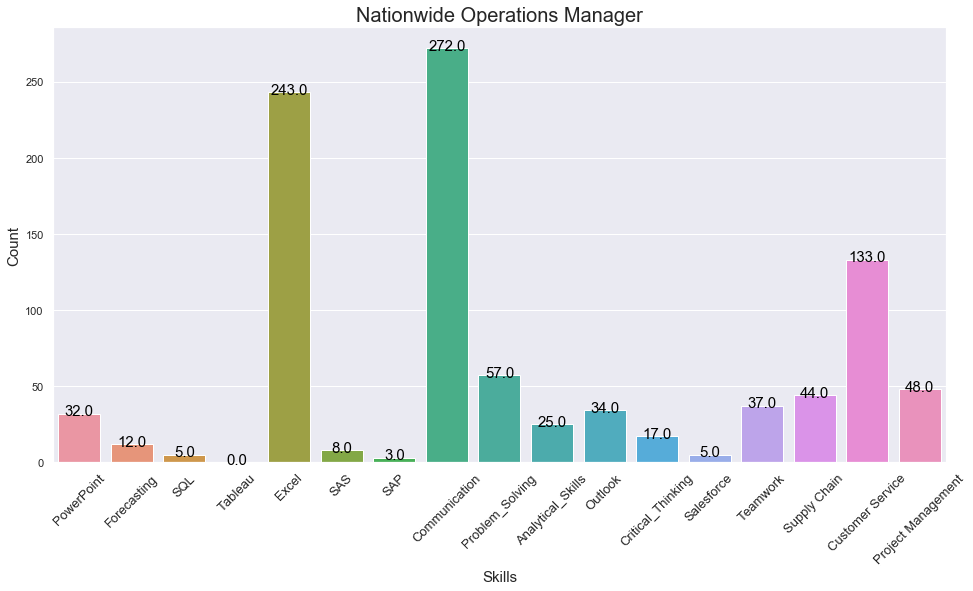

In [20]:
plot_count2(nw_count, nw_total, 'Nationwide Operations Manager')

https://www.indeed.com/m/jobs?q=operations+manager&l=Washington%2C+DC
Total Jobs: 357
Number of Jobs: 357
                skills  Count
0           PowerPoint   38.0
1          Forecasting   15.0
2                  SQL   10.0
3              Tableau    2.0
4                Excel  205.0
5                  SAS    7.0
6                  SAP    0.0
7        Communication  247.0
8      Problem_Solving   52.0
9    Analytical_Skills   22.0
10             Outlook   32.0
11   Critical_Thinking   20.0
12          Salesforce    8.0
13            Teamwork   20.0
14        Supply Chain   29.0
15    Customer Service  106.0
16  Project Management   73.0


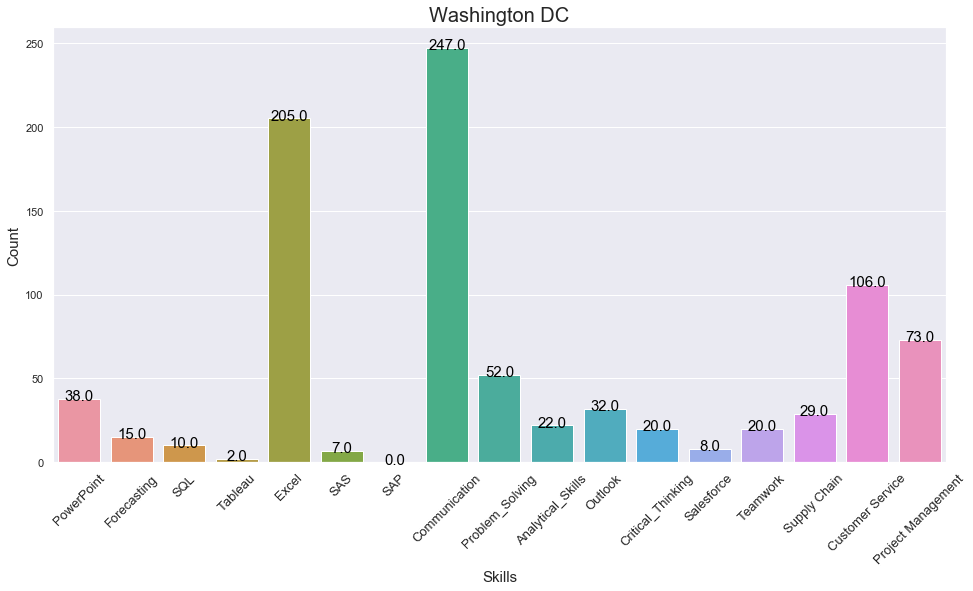

https://www.indeed.com/m/jobs?q=operations+manager&l=New+York
Total Jobs: 382
Number of Jobs: 382
                skills  Count
0           PowerPoint   38.0
1          Forecasting   21.0
2                  SQL   18.0
3              Tableau    5.0
4                Excel  245.0
5                  SAS    8.0
6                  SAP    0.0
7        Communication  252.0
8      Problem_Solving   46.0
9    Analytical_Skills   24.0
10             Outlook   36.0
11   Critical_Thinking    7.0
12          Salesforce   16.0
13            Teamwork   21.0
14        Supply Chain   26.0
15    Customer Service   96.0
16  Project Management   69.0


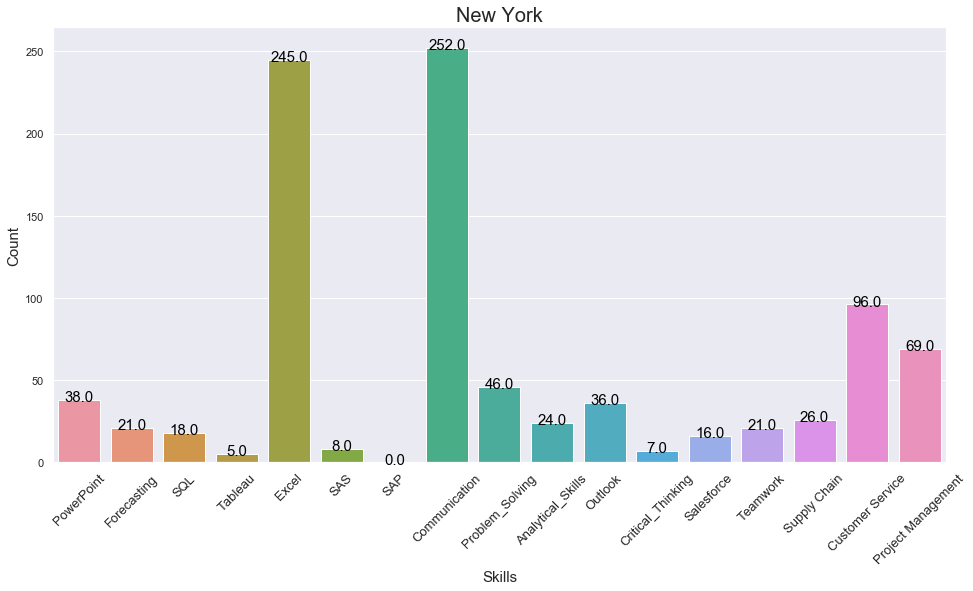

https://www.indeed.com/m/jobs?q=operations+manager&l=San+Francisco
Total Jobs: 312
Number of Jobs: 312
                skills  Count
0           PowerPoint   19.0
1          Forecasting   22.0
2                  SQL   30.0
3              Tableau    8.0
4                Excel  197.0
5                  SAS    1.0
6                  SAP    0.0
7        Communication  192.0
8      Problem_Solving   37.0
9    Analytical_Skills   27.0
10             Outlook   17.0
11   Critical_Thinking    5.0
12          Salesforce   33.0
13            Teamwork   16.0
14        Supply Chain   18.0
15    Customer Service   66.0
16  Project Management   78.0


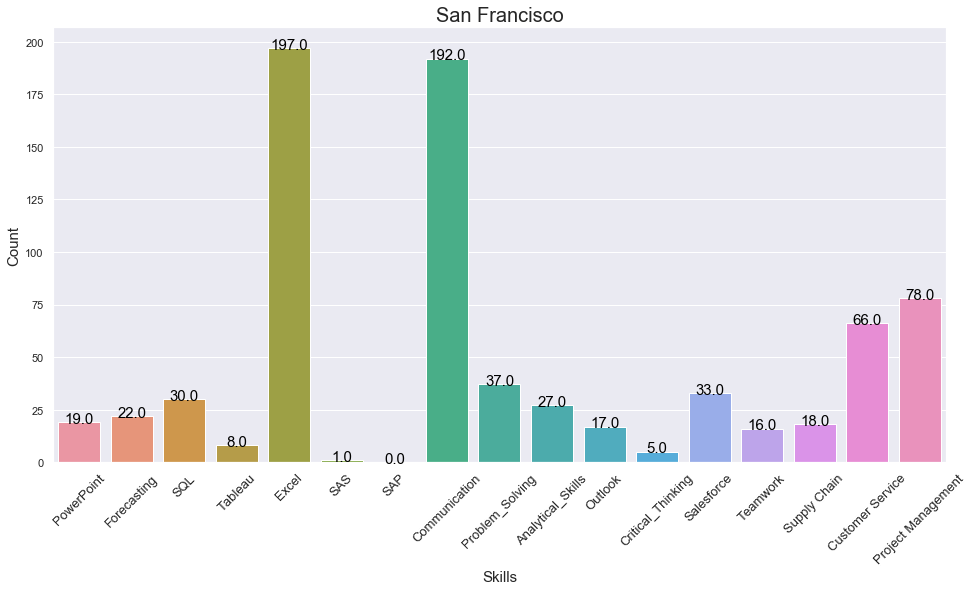

https://www.indeed.com/m/jobs?q=operations+manager&l=Chicago
Total Jobs: 408
Number of Jobs: 408
                skills  Count
0           PowerPoint   60.0
1          Forecasting   15.0
2                  SQL   13.0
3              Tableau    2.0
4                Excel  285.0
5                  SAS   13.0
6                  SAP    4.0
7        Communication  283.0
8      Problem_Solving   70.0
9    Analytical_Skills   41.0
10             Outlook   31.0
11   Critical_Thinking   16.0
12          Salesforce   21.0
13            Teamwork   33.0
14        Supply Chain   38.0
15    Customer Service  148.0
16  Project Management   87.0


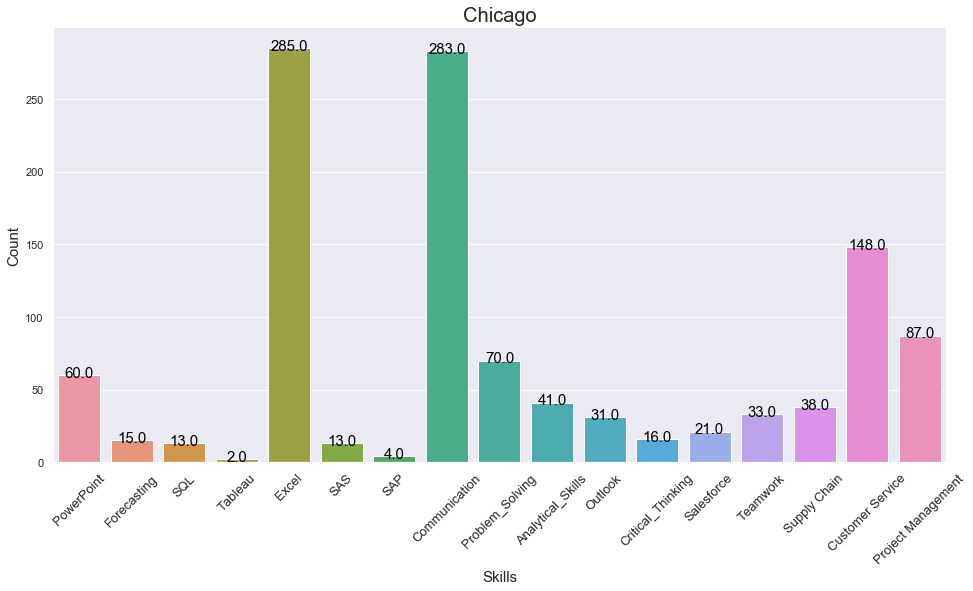

https://www.indeed.com/m/jobs?q=operations+manager&l=Philadelphia
Total Jobs: 213
Number of Jobs: 213
                skills  Count
0           PowerPoint   17.0
1          Forecasting    7.0
2                  SQL    1.0
3              Tableau    0.0
4                Excel  129.0
5                  SAS    4.0
6                  SAP    0.0
7        Communication  130.0
8      Problem_Solving   28.0
9    Analytical_Skills   12.0
10             Outlook   20.0
11   Critical_Thinking   11.0
12          Salesforce    3.0
13            Teamwork    6.0
14        Supply Chain   11.0
15    Customer Service   68.0
16  Project Management   25.0


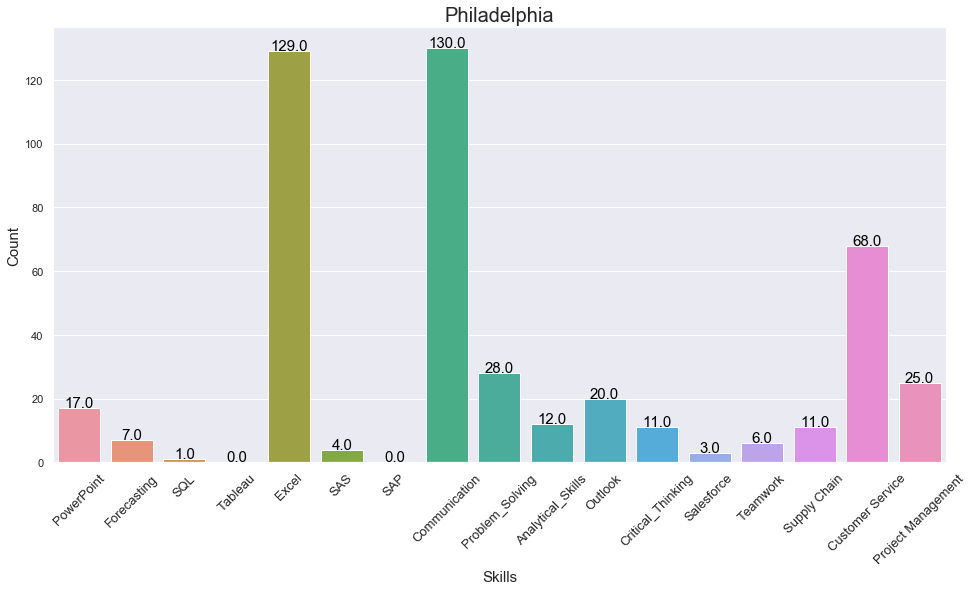

https://www.indeed.com/m/jobs?q=operations+manager&l=Houston
Total Jobs: 219
Number of Jobs: 219
                skills  Count
0           PowerPoint   15.0
1          Forecasting    5.0
2                  SQL    5.0
3              Tableau    0.0
4                Excel  132.0
5                  SAS    9.0
6                  SAP    3.0
7        Communication  131.0
8      Problem_Solving   23.0
9    Analytical_Skills   13.0
10             Outlook   26.0
11   Critical_Thinking    6.0
12          Salesforce    4.0
13            Teamwork   17.0
14        Supply Chain   21.0
15    Customer Service   69.0
16  Project Management   33.0


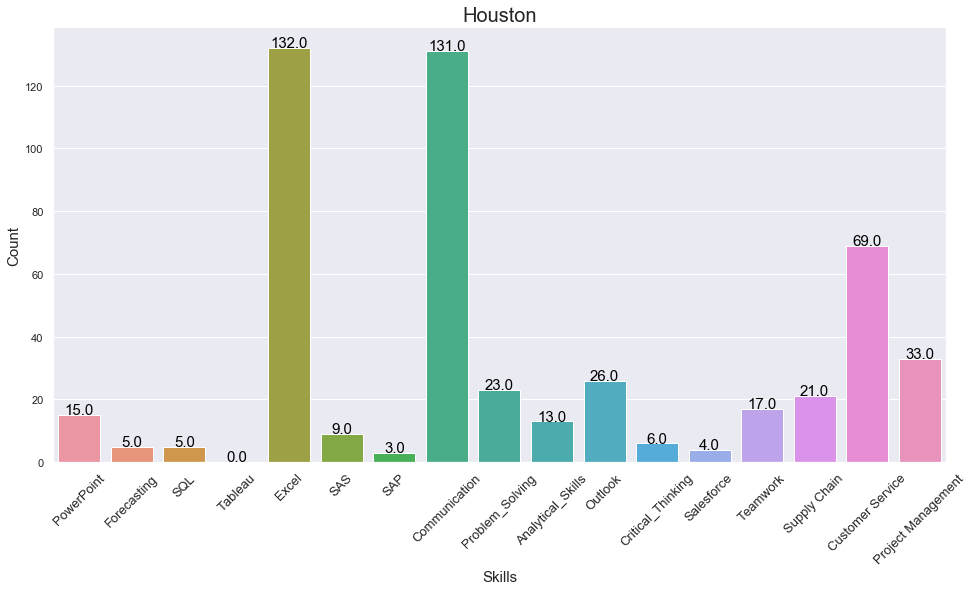

In [21]:
items = {'Washington%2C+DC':30,'New+York':30, 'San+Francisco':30, 'Chicago':30, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=operations+manager&l={}'
df_count_om = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df_count, df_total = getlink2(url,i[1])
    if i[0] == 'Washington%2C+DC':
        plot_count2(df_count, df_total, 'Washington DC')
        df_count['City'] = 'Washington DC'
    elif i[0] == 'New+York':
        plot_count2(df_count, df_total, 'New York')
        df_count['City'] = 'New York'
    elif i[0] == 'San+Francisco':
        plot_count2(df_count, df_total, 'San Francisco')
        df_count['City'] = 'San Francisco'
    else:
        plot_count2(df_count, df_total,i[0] )
        df_count['City'] = i[0]
    df_count['Title'] = 'Manager'
    df_count_om = df_count_om.append(df_count)

                skills   Count
0    Analytical_Skills   139.0
1        Communication  1235.0
2    Critical_Thinking    65.0
3     Customer Service   553.0
4                Excel  1193.0
5          Forecasting    85.0
6              Outlook   162.0
7           PowerPoint   187.0
8      Problem_Solving   256.0
9   Project Management   365.0
10                 SAP     7.0
11                 SAS    42.0
12                 SQL    77.0
13          Salesforce    85.0
14        Supply Chain   143.0
15             Tableau    17.0
16            Teamwork   113.0


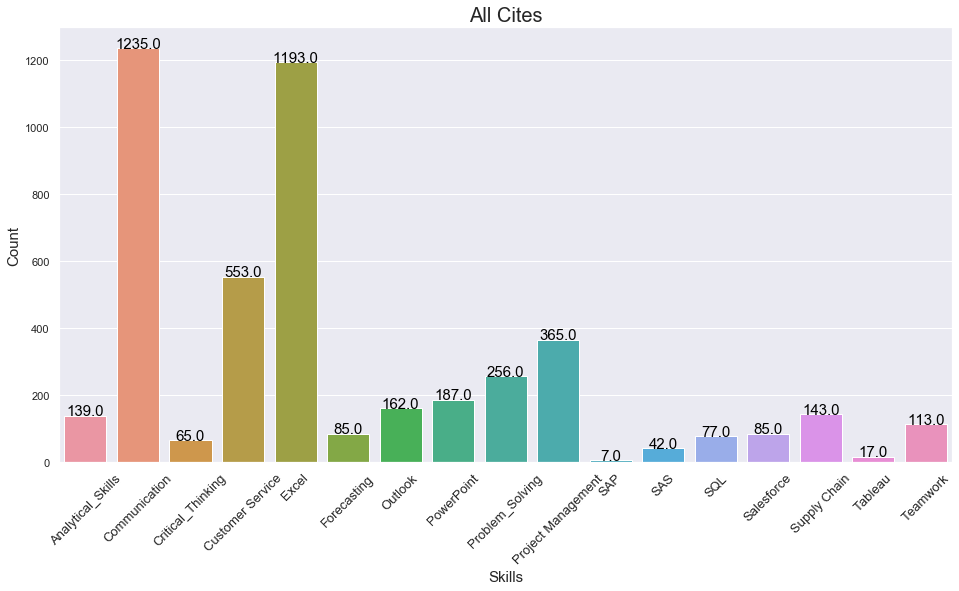

In [23]:
df_om = df_count_om.groupby('skills').agg({'Count':'sum'}).reset_index()
print(df_om)
fig = plt.figure(figsize = (16,8))
sns.barplot(x='skills', y='Count', data=df_om).set_title('All Cites',fontsize=20)
plt.xticks(rotation=45, fontsize = 13)
plt.xlabel('Skills',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, int(height) + 12.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Operations Directors

#### Nationwide

In [25]:
nw_count2, nw_total2 = getlink2("https://www.indeed.com/m/jobs?q=operations+director",40)

Total Jobs: 449


Number of Jobs: 449
                skills  Count
0           PowerPoint   37.0
1          Forecasting   25.0
2                  SQL    2.0
3              Tableau    1.0
4                Excel  274.0
5                  SAS   13.0
6                  SAP    1.0
7        Communication  264.0
8      Problem_Solving   45.0
9    Analytical_Skills   30.0
10             Outlook   24.0
11   Critical_Thinking   13.0
12          Salesforce    6.0
13            Teamwork   26.0
14        Supply Chain   37.0
15    Customer Service  126.0
16  Project Management   51.0


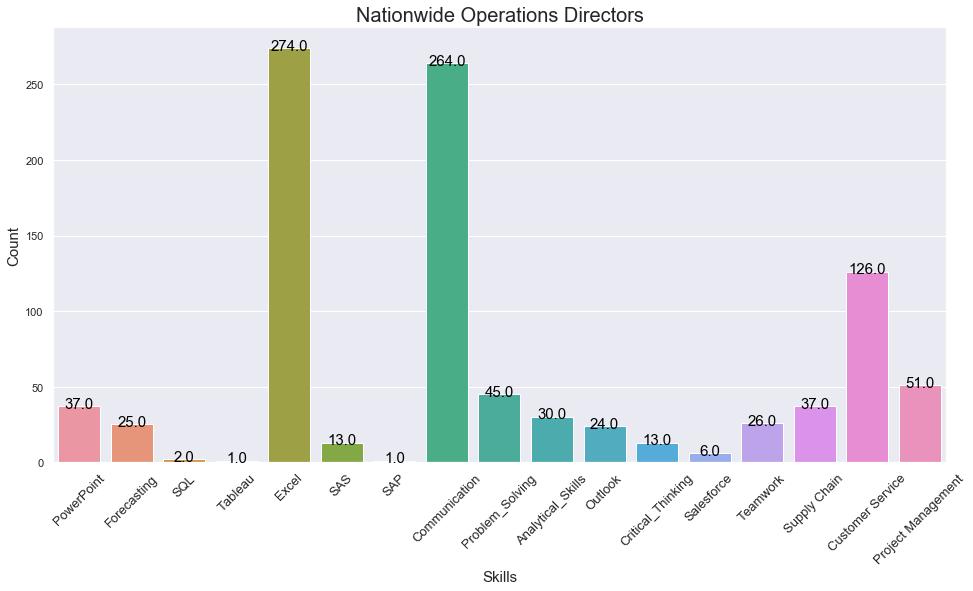

In [26]:
plot_count2(nw_count2, nw_total2, 'Nationwide Operations Directors')

https://www.indeed.com/m/jobs?q=operations+directorr&l=Washington%2C+DC
Total Jobs: 312
Number of Jobs: 312
                skills  Count
0           PowerPoint   31.0
1          Forecasting   13.0
2                  SQL    1.0
3              Tableau    1.0
4                Excel  177.0
5                  SAS    1.0
6                  SAP    0.0
7        Communication  209.0
8      Problem_Solving   30.0
9    Analytical_Skills    8.0
10             Outlook   21.0
11   Critical_Thinking    8.0
12          Salesforce    4.0
13            Teamwork   42.0
14        Supply Chain    4.0
15    Customer Service   72.0
16  Project Management   53.0


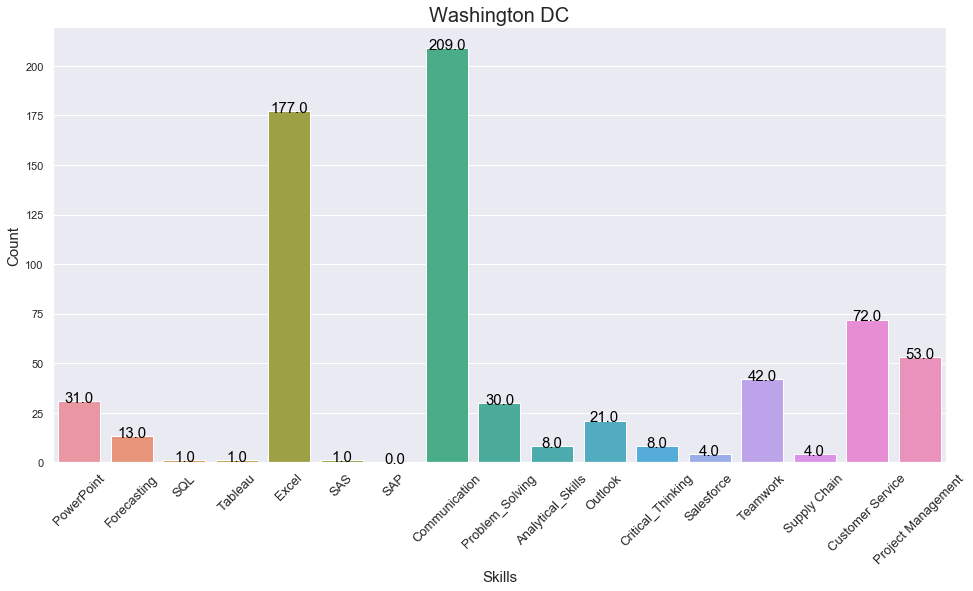

https://www.indeed.com/m/jobs?q=operations+directorr&l=New+York
Total Jobs: 367
Number of Jobs: 367
                skills  Count
0           PowerPoint   34.0
1          Forecasting   18.0
2                  SQL    2.0
3              Tableau    2.0
4                Excel  216.0
5                  SAS    4.0
6                  SAP    3.0
7        Communication  232.0
8      Problem_Solving   29.0
9    Analytical_Skills   20.0
10             Outlook   18.0
11   Critical_Thinking    5.0
12          Salesforce    8.0
13            Teamwork   20.0
14        Supply Chain   22.0
15    Customer Service   86.0
16  Project Management   49.0


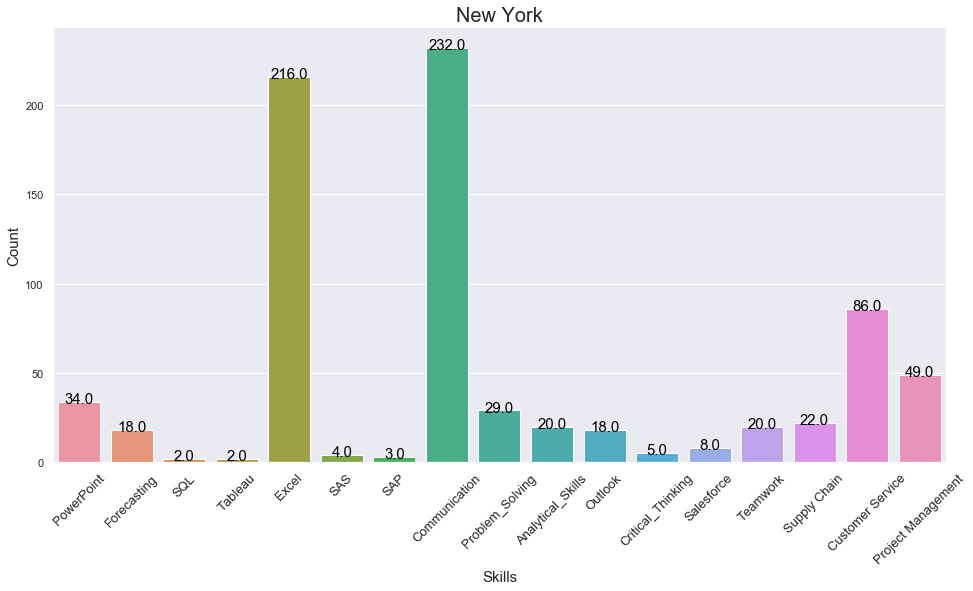

https://www.indeed.com/m/jobs?q=operations+directorr&l=San+Francisco
Total Jobs: 381
Number of Jobs: 381
                skills  Count
0           PowerPoint   29.0
1          Forecasting   29.0
2                  SQL   10.0
3              Tableau    4.0
4                Excel  251.0
5                  SAS    3.0
6                  SAP    4.0
7        Communication  252.0
8      Problem_Solving   50.0
9    Analytical_Skills   21.0
10             Outlook   27.0
11   Critical_Thinking    6.0
12          Salesforce   28.0
13            Teamwork   35.0
14        Supply Chain   17.0
15    Customer Service  100.0
16  Project Management   57.0


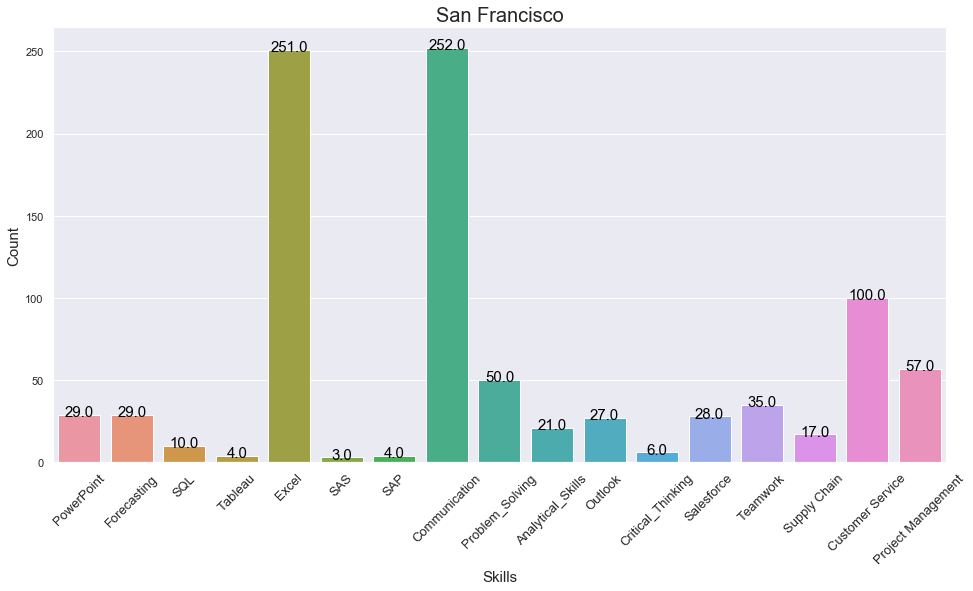

https://www.indeed.com/m/jobs?q=operations+directorr&l=Chicago
Total Jobs: 341
Number of Jobs: 341
                skills  Count
0           PowerPoint   32.0
1          Forecasting   15.0
2                  SQL    1.0
3              Tableau    2.0
4                Excel  214.0
5                  SAS    2.0
6                  SAP    3.0
7        Communication  222.0
8      Problem_Solving   37.0
9    Analytical_Skills   27.0
10             Outlook   28.0
11   Critical_Thinking    6.0
12          Salesforce    9.0
13            Teamwork   22.0
14        Supply Chain   27.0
15    Customer Service  104.0
16  Project Management   53.0


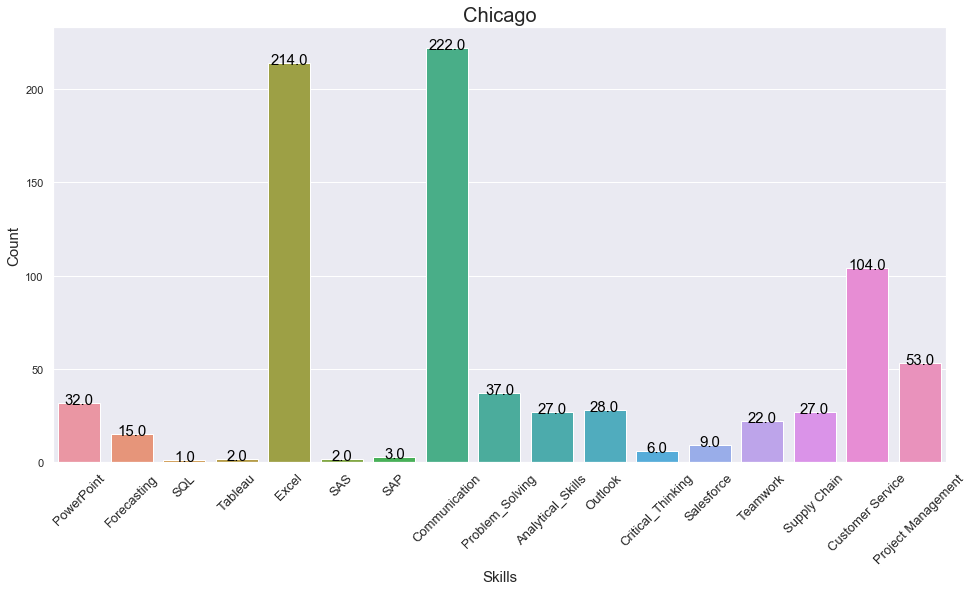

https://www.indeed.com/m/jobs?q=operations+directorr&l=Philadelphia
Total Jobs: 243
Number of Jobs: 243
                skills  Count
0           PowerPoint   23.0
1          Forecasting   12.0
2                  SQL    4.0
3              Tableau    2.0
4                Excel  142.0
5                  SAS    3.0
6                  SAP    0.0
7        Communication  138.0
8      Problem_Solving   21.0
9    Analytical_Skills    6.0
10             Outlook   14.0
11   Critical_Thinking    5.0
12          Salesforce    3.0
13            Teamwork   20.0
14        Supply Chain   15.0
15    Customer Service   57.0
16  Project Management   30.0


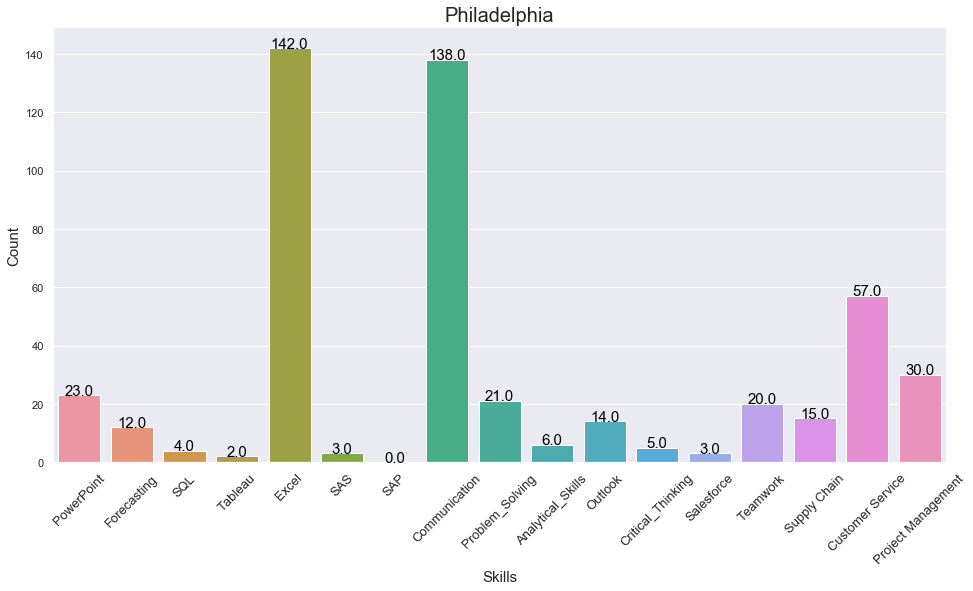

https://www.indeed.com/m/jobs?q=operations+directorr&l=Houston
Total Jobs: 214
Number of Jobs: 214
                skills  Count
0           PowerPoint   15.0
1          Forecasting   11.0
2                  SQL    1.0
3              Tableau    2.0
4                Excel  120.0
5                  SAS    4.0
6                  SAP    0.0
7        Communication  123.0
8      Problem_Solving   19.0
9    Analytical_Skills   14.0
10             Outlook   18.0
11   Critical_Thinking   10.0
12          Salesforce    5.0
13            Teamwork   17.0
14        Supply Chain   11.0
15    Customer Service   68.0
16  Project Management   15.0


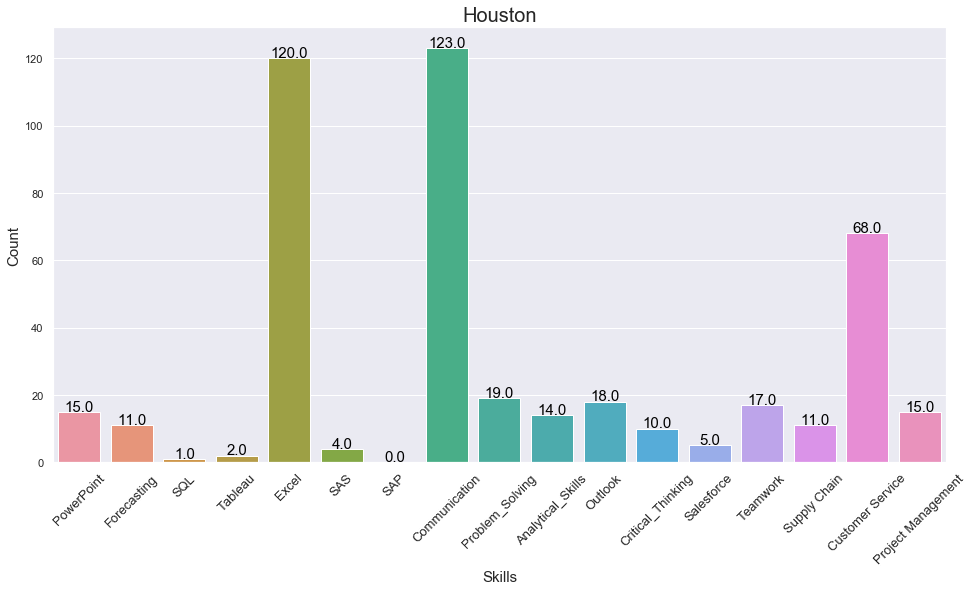

In [27]:
items = {'Washington%2C+DC':30,'New+York':30, 'San+Francisco':30, 'Chicago':30, 'Philadelphia':20, 'Houston':20}
url_test = 'https://www.indeed.com/m/jobs?q=operations+directorr&l={}'
df_count_od = pd.DataFrame([])
for i in items.items():
    url = url_test.format(i[0])
    print(url)
    df_count, df_total = getlink2(url,i[1])
    if i[0] == 'Washington%2C+DC':
        plot_count2(df_count, df_total, 'Washington DC')
        df_count['City'] = 'Washington DC'
    elif i[0] == 'New+York':
        plot_count2(df_count, df_total, 'New York')
        df_count['City'] = 'New York'
    elif i[0] == 'San+Francisco':
        plot_count2(df_count, df_total, 'San Francisco')
        df_count['City'] = 'San Francisco'
    else:
        plot_count2(df_count, df_total,i[0] )
        df_count['City'] = i[0]
    df_count['Title'] = 'Manager'
    df_count_od = df_count_od.append(df_count)

                skills   Count
0    Analytical_Skills    96.0
1        Communication  1176.0
2    Critical_Thinking    40.0
3     Customer Service   487.0
4                Excel  1120.0
5          Forecasting    98.0
6              Outlook   126.0
7           PowerPoint   164.0
8      Problem_Solving   186.0
9   Project Management   257.0
10                 SAP    10.0
11                 SAS    17.0
12                 SQL    19.0
13          Salesforce    57.0
14        Supply Chain    96.0
15             Tableau    13.0
16            Teamwork   156.0


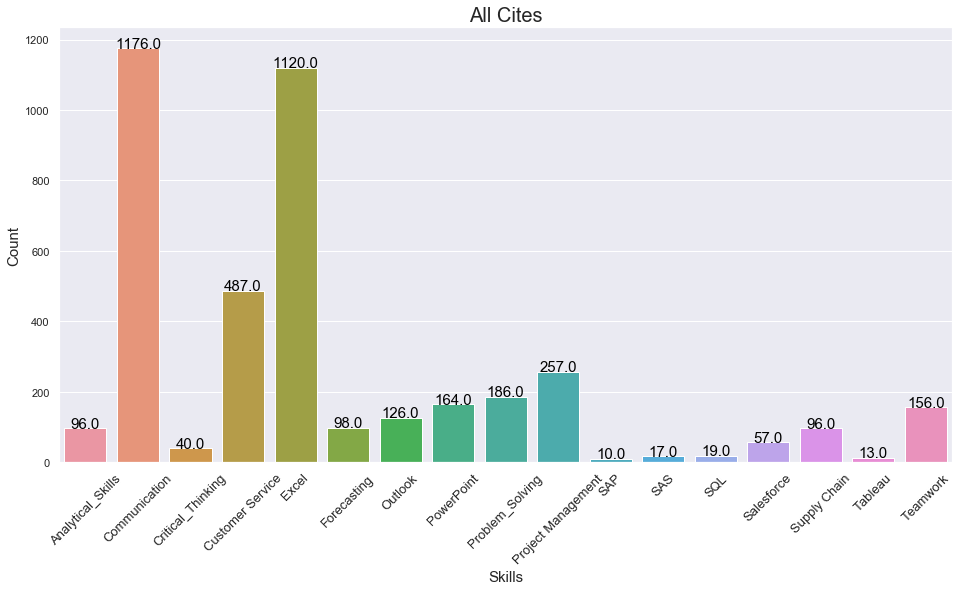

In [29]:
df_od = df_count_od.groupby('skills').agg({'Count':'sum'}).reset_index()
print(df_od)
fig = plt.figure(figsize = (16,8))
sns.barplot(x='skills', y='Count', data=df_od).set_title('All Cites',fontsize=20)
plt.xticks(rotation=45, fontsize = 13)
plt.xlabel('Skills',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, int(height) + 12.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

### Dataset for tableau

In [30]:
df30 = pd.concat([df_count_om, df_count_od], axis = 0)
df_final = df30.groupby(['City', 'skills']).agg({'Count':'sum'})
df_final

Count
City          skills                  
Chicago       Analytical_Skills   68.0
              Communication      505.0
              Critical_Thinking   22.0
              Customer Service   252.0
              Excel              499.0
...                                ...
Washington DC SQL                 11.0
              Salesforce          12.0
              Supply Chain        33.0
              Tableau              3.0
              Teamwork            62.0

[102 rows x 1 columns]

In [31]:
df_final.to_csv('Operations_data.csv')